In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import json
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms

In [2]:
df1 = pd.read_csv("./data/personal_train.csv", index_col=0)
df2 = pd.read_csv("./data/other_train.csv", index_col=0)

In [3]:
#moje su len vo vacsom dataframe
attributes_marcel = ["marital-status", "pregnant", "relationship", "education", "education-num", "occupation", 
                     "income", "fnlwgt", "workclass", "hours-per-week", "capital-gain", "capital-loss", "medical_info", 
                     "class"]

In [4]:
data = df2[attributes_marcel]
data.head()

,marital-status,pregnant,relationship,education,education-num,occupation,income,fnlwgt,workclass,hours-per-week,capital-gain,capital-loss,medical_info,class
0,Married-civ-spouse,f,Husband,Bachelors,13.0,Sales,>50K,116358.0,Self-emp-inc,50.0,0.0,0.0,"{'mean_oxygen':'1.059364548','std_oxygen':'10....",0.0
1,Never-married,f,Own-child,Some-college,10.0,?,<=50K,243190.0,?,40.0,0.0,0.0,"{'mean_oxygen':'2.557692308','std_oxygen':'14....",0.0
2,Divorced,f,Unmarried,HS-grad,9.0,Other-service,<=50K,96840.0,Private,40.0,0.0,0.0,"{'mean_oxygen':'1.549331104','std_oxygen':'14....",0.0
3,Married-civ-spouse,f,Husband,Bachelors,13.0,Craft-repair,>50K,180439.0,Private,40.0,0.0,0.0,"{'mean_oxygen':'197.2341137','std_oxygen':'63....",0.0
4,Married-civ-spouse,f,Husband,Some-college,10.0,?,<=50K,115745.0,?,40.0,0.0,0.0,"{'mean_oxygen':'1.617056856','std_oxygen':'16....",0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   marital-status  3969 non-null   object 
 1   pregnant        3973 non-null   object 
 2   relationship    3965 non-null   object 
 3   education       3973 non-null   object 
 4   education-num   3972 non-null   float64
 5   occupation      3969 non-null   object 
 6   income          3972 non-null   object 
 7   fnlwgt          3969 non-null   float64
 8   workclass       3967 non-null   object 
 9   hours-per-week  3968 non-null   float64
 10  capital-gain    3970 non-null   float64
 11  capital-loss    3967 non-null   float64
 12  medical_info    3965 non-null   object 
 13  class           3965 non-null   float64
dtypes: float64(6), object(8)
memory usage: 466.8+ KB


In [6]:
data.isnull().sum()

marital-status    14
pregnant          10
relationship      18
education         10
education-num     11
occupation        14
income            11
fnlwgt            14
workclass         16
hours-per-week    15
capital-gain      13
capital-loss      16
medical_info      18
class             18
dtype: int64

In [7]:
missing = (data.isnull().sum() / data.shape[0])
missing

marital-status    0.003515
pregnant          0.002511
relationship      0.004519
education         0.002511
education-num     0.002762
occupation        0.003515
income            0.002762
fnlwgt            0.003515
workclass         0.004017
hours-per-week    0.003766
capital-gain      0.003264
capital-loss      0.004017
medical_info      0.004519
class             0.004519
dtype: float64

In [8]:
data.nunique()

marital-status       7
pregnant             6
relationship         6
education           16
education-num       16
occupation          26
income               4
fnlwgt            3677
workclass            9
hours-per-week      70
capital-gain        76
capital-loss        51
medical_info      3932
class                2
dtype: int64

# Analyza atributov

## Univariate Analyza

### y - prediction

In [9]:
data["class"].value_counts()

0.0    2953
1.0    1012
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

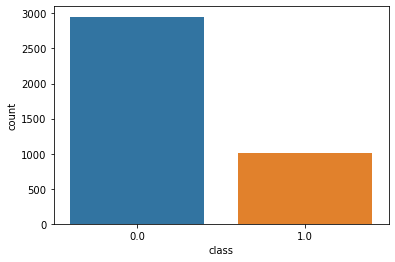

In [10]:
sns.countplot(data=data, x="class")

In [11]:
len(data[data["class"] == 1]) / len(data)

0.25407983931709766

In [12]:
def f(figsize):
    if figsize is not None:
        plt.figure(figsize=figsize)

def univariate_categ_to_class(data, categ_attr, cls="class", figsize=None):
    print(data[categ_attr].value_counts())
        
    f(figsize)
    sns.countplot(data=data, y=categ_attr, hue=cls)
    

In [13]:
def univariate_num(data, num_attr, figsize=None):
    print(data[num_attr].describe())
    
    print("Skewness:", stats.skew(data[num_attr], nan_policy="omit").data) 
    print("Kurtosis:", stats.kurtosis(data[num_attr], nan_policy="omit"))
        
    mean = data[num_attr].mean()
    median = data[num_attr].median()
    mode = data[num_attr].mode()[0]
    
    f(figsize)

    sns.boxplot(data=data, x=num_attr)
    plt.show()
    
    f(figsize)
    
    plt.axvline(mean, linestyle='-', label="mean")
    plt.axvline(median, linestyle='--', label="median")
    plt.axvline(mode, linestyle=':', label="mode")
    
    sns.distplot(data[num_attr], bins=20)
    plt.legend()
    plt.show()
    

In [14]:
def univariate_num_to_class(data, num_attr, cls="class", threshold=0.4, figsize=None):
 
    corr = data[[num_attr,cls]].corr().iloc[0,1]
    print("Korelacia medzi nasim atributom a y:", corr)
    
    if figsize is not None:
        plt.figure(figsize=figsize)

    sns.violinplot(data=data, y=num_attr, x=cls)
    plt.show()

    f(figsize)
    
    sns.distplot(data[data[cls] == 0][num_attr], bins=20, label=cls+"0")
    sns.distplot(data[data[cls] == 1][num_attr], bins=20, label=cls+"1")
    plt.legend()
    plt.show()
    
    if corr > threshold or corr < -threshold:
        f(figsize)
        sns.regplot(data=data, x=num_attr, y=cls, logistic=True)
        plt.show()

#### marital-status

Pozor, je tam whitespace na zaciatku kazdej hodnoty... Teraz nas to avsak extra netrapi

In [15]:
data["marital-status"].unique()

array([' Married-civ-spouse', ' Never-married', ' Divorced', ' Separated',
       ' Widowed', ' Married-spouse-absent', nan, ' Married-AF-spouse'],
      dtype=object)

 Married-civ-spouse       1861
 Never-married            1257
 Divorced                  549
 Separated                 142
 Widowed                   116
 Married-spouse-absent      41
 Married-AF-spouse           3
Name: marital-status, dtype: int64


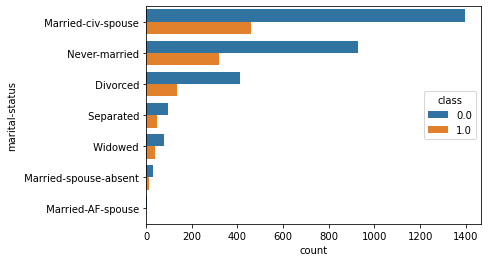

In [16]:
univariate_categ_to_class(data, "marital-status")

Pocet ludi s cukrovkou v jednotlivych kategoriach...

In [17]:
def get_percent_of_class_in_attr(data, attr, class_col="class", class_value=1):
    left = data[attr].value_counts().to_frame()
    right = data[data[class_col] == class_value][attr].value_counts().to_frame()

    lsuffix = "-total"
    rsuffix = "-" + class_col + str(class_value)
    
    leftname = attr + lsuffix
    rightname = attr + rsuffix
    
    joined = left.join(right, how="left", lsuffix=lsuffix, rsuffix=rsuffix).fillna(0)
    
    return (joined[rightname] / joined[leftname]).sort_values(ascending=False)

In [18]:
get_percent_of_class_in_attr(data, "marital-status")

 Separated                0.323944
 Widowed                  0.318966
 Married-spouse-absent    0.268293
 Never-married            0.253779
 Divorced                 0.247723
 Married-civ-spouse       0.247179
 Married-AF-spouse        0.000000
dtype: float64

#### pregnant

In [19]:
data["pregnant"].value_counts()

f        3516
FALSE     201
F         189
t          61
TRUE        3
T           3
Name: pregnant, dtype: int64

In [20]:
mask = data["pregnant"].notna()

In [21]:
pregnant_bool = data["pregnant"][mask].apply(lambda row: True if row != np.nan and re.match("^(t|T)", row) else False)
pregnant_bool = pregnant_bool.to_frame()

In [22]:
pregnant_bool.value_counts()

pregnant
False       3906
True          67
dtype: int64

<AxesSubplot:xlabel='pregnant', ylabel='count'>

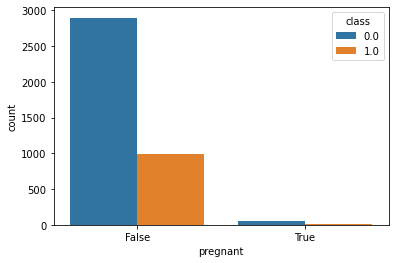

In [23]:
pregnant_data = pregnant_bool.join(data["class"], how="left")

sns.countplot(data=pregnant_data, x="pregnant", hue="class")

In [24]:
pregnant_data.value_counts()

pregnant  class
False     0.0      2898
          1.0       992
True      0.0        50
          1.0        17
dtype: int64

#### relationship

Dalsi whitespace na zaciatku stringov...

In [25]:
data["relationship"].unique()

array([' Husband', ' Own-child', ' Unmarried', ' Not-in-family', ' Wife',
       ' Other-relative', nan], dtype=object)

 Husband           1635
 Not-in-family      981
 Own-child          607
 Unmarried          429
 Wife               195
 Other-relative     118
Name: relationship, dtype: int64


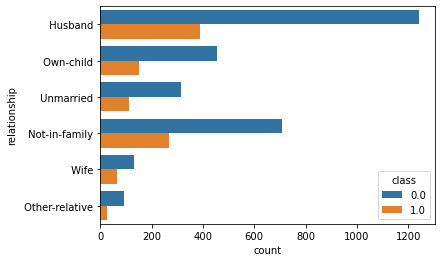

In [26]:
univariate_categ_to_class(data, "relationship")

In [27]:
get_percent_of_class_in_attr(data, "relationship")

 Wife              0.328205
 Not-in-family     0.271152
 Unmarried         0.261072
 Own-child         0.245470
 Husband           0.236697
 Other-relative    0.220339
dtype: float64

#### education

Asi by som to rozdelil do mensieho poctu kategorii...

Znova whitespace...

In [28]:
data["education"].unique()

array([' Bachelors', ' Some-college', ' HS-grad', ' 11th', ' 9th',
       ' Preschool', ' Assoc-acdm', ' Assoc-voc', ' Prof-school', ' 12th',
       ' Doctorate', ' 5th-6th', ' 10th', ' Masters', ' 7th-8th',
       ' 1st-4th', nan], dtype=object)

Teraz to rovno upravim, aby som nemusel pocitat s danou medzerou

In [29]:
data["education"] = data["education"].apply(lambda row: row.strip() if row is not np.nan else row)

data["education"].unique()

<ipython-input-29-558193ad8e6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["education"] = data["education"].apply(lambda row: row.strip() if row is not np.nan else row)


array(['Bachelors', 'Some-college', 'HS-grad', '11th', '9th', 'Preschool',
       'Assoc-acdm', 'Assoc-voc', 'Prof-school', '12th', 'Doctorate',
       '5th-6th', '10th', 'Masters', '7th-8th', '1st-4th', nan],
      dtype=object)

HS-grad         1328
Some-college     863
Bachelors        624
Masters          215
Assoc-voc        166
Assoc-acdm       158
11th             128
10th             119
7th-8th           89
Prof-school       68
12th              58
Doctorate         52
9th               47
5th-6th           36
1st-4th           16
Preschool          6
Name: education, dtype: int64


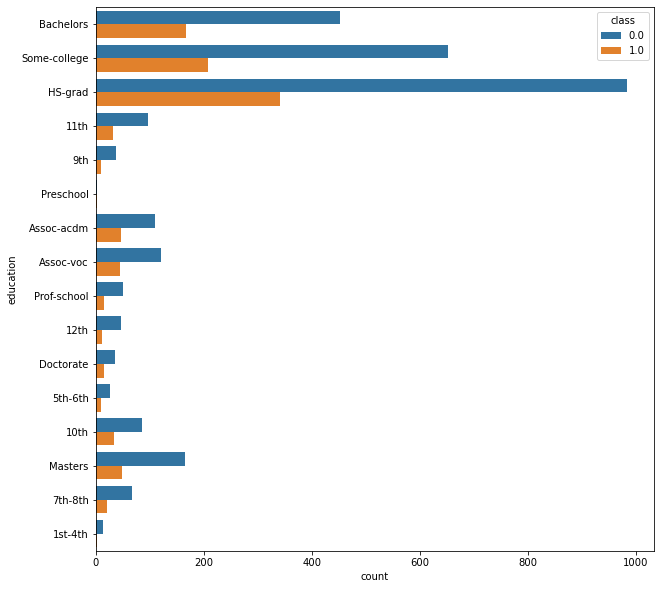

In [30]:
univariate_categ_to_class(data, "education", figsize=(10,10))

https://sites.google.com/site/complexdataminingproject/ - na tejto stranke su opisane niektore atributy, s ktorymi pracujeme

>  Preschool < 1st-4th < 5th-6th < 7th-8th < 9th < 10th < 11th < 12th < HS-grad < Prof-school < Assoc-acdm < Assoc-voc < Some-college < Bachelors < Masters < Doctorate. 

Deti malokedy mavaju cukrovku, tak kludne mozeme kategoriu Attending-school, co obsahuje preschool a skupinu K-12, co reprezentuje 12 rocnikov od elementary school po high school.

Tipujem, ze HS-grad znamena, ze dany clovek nepokracoval na vysoku skolu, takze to nechame ako samostatnu kategoriu.

Problemom vsak je, ze mame tu kategoriu some-college, ktora je dost zastupena, ale tak aj je napriklad kategoria Bachelor. Takze zatial nejdem mergovat kategorie pre vysokoskolske stupne

In [31]:
data["simple-edu"] = data["education"].copy()

<ipython-input-31-8ca6b411e47e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["simple-edu"] = data["education"].copy()


In [32]:
def simplify_education(row):
        
    edu = row["education"]
        
    if edu is np.nan:
        row["simple-edu"] = edu
        
    elif re.match("^([0-9][a-zA-Z])|(1[0-2][a-zA-Z])", edu) or edu == "Preschool":
        row["simple-edu"] = "Attending-school"
        
    elif edu in ["Assoc-acdm", "Assoc-voc", "Prof-school"]:
        row["simple-edu"] = "Edu after HS, no uni"
        
    elif edu in ["Masters", "Doctorate"]:
        row["simple-edu"] = "Masters/Doctorate"
        
    else:
        row["simple-edu"] = row["education"]
    
    return row
        
data = data.apply(simplify_education, axis=1)

HS-grad                 1328
Some-college             863
Bachelors                624
Attending-school         499
Edu after HS, no uni     392
Masters/Doctorate        267
Name: simple-edu, dtype: int64


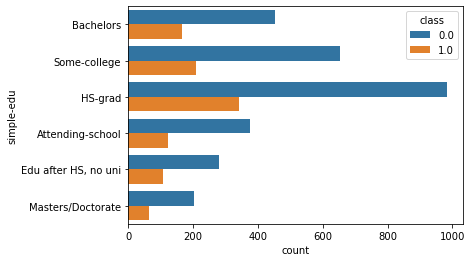

In [33]:
univariate_categ_to_class(data, "simple-edu")

In [34]:
get_percent_of_class_in_attr(data, "simple-edu")

Edu after HS, no uni    0.272959
Bachelors               0.267628
HS-grad                 0.256777
Attending-school        0.246493
Some-college            0.241020
Masters/Doctorate       0.235955
dtype: float64

#### education-num

count    3972.000000
mean       10.087865
std         2.541340
min         1.000000
25%         9.000000
50%        10.000000
75%        12.000000
max        16.000000
Name: education-num, dtype: float64
Skewness: -0.2753803626413893
Kurtosis: 0.6364151029333103


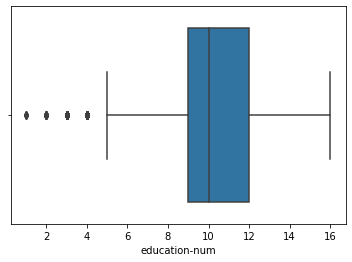

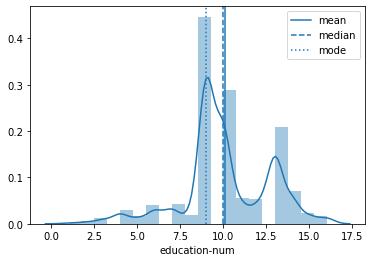

In [35]:
univariate_num(data, "education-num")

Korelacia medzi nasim atributom a y: 0.009046166634345468


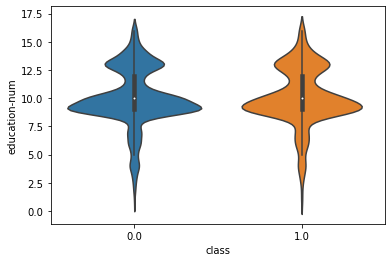

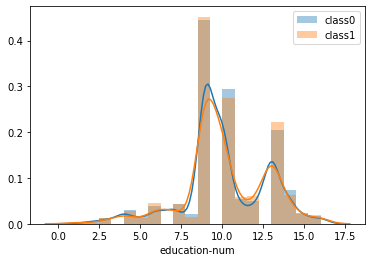

In [36]:
univariate_num_to_class(data, "education-num")

#### occupation

Je tam viacero duplicitnych hodnot, ktore su len zle zformatovane, tak, aby sme mali lepsiu predstavu o pocetnosti jednotlivych pravych hodnot, tak to treba trochu upravit...

In [37]:
print(data["occupation"].nunique())
data["occupation"].unique()

26


array([' Sales', ' ?', ' Other-service', ' Craft-repair',
       ' Handlers-cleaners', ' Machine-op-inspct', ' Exec-managerial',
       ' Adm_clerical', ' Handlers_cleaners', ' Transport-moving',
       ' Protective-serv', ' Tech-support', ' Adm-clerical',
       ' Prof-specialty', ' Farming-fishing', nan, ' Craft_repair',
       ' Prof_specialty', ' Exec_managerial', ' Transport_moving',
       ' Tech_support', ' Priv-house-serv', ' Protective_serv',
       ' Machine_op_inspct', ' Other_service', ' Farming_fishing',
       ' Armed-Forces'], dtype=object)

In [38]:
data["occupation"] = data["occupation"].apply(lambda row: np.nan if row is not np.nan and row.strip() == "?" else row)
data["occupation"] = data["occupation"].apply(lambda row: row.strip().replace("_", "-") if row is not np.nan else row)

print(data["occupation"].nunique())
data["occupation"].unique()

14


array(['Sales', nan, 'Other-service', 'Craft-repair', 'Handlers-cleaners',
       'Machine-op-inspct', 'Exec-managerial', 'Adm-clerical',
       'Transport-moving', 'Protective-serv', 'Tech-support',
       'Prof-specialty', 'Farming-fishing', 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

Craft-repair         528
Prof-specialty       502
Exec-managerial      485
Adm-clerical         480
Sales                437
Other-service        403
Machine-op-inspct    243
Transport-moving     197
Handlers-cleaners    162
Farming-fishing      106
Tech-support         106
Protective-serv       73
Priv-house-serv       12
Armed-Forces           1
Name: occupation, dtype: int64


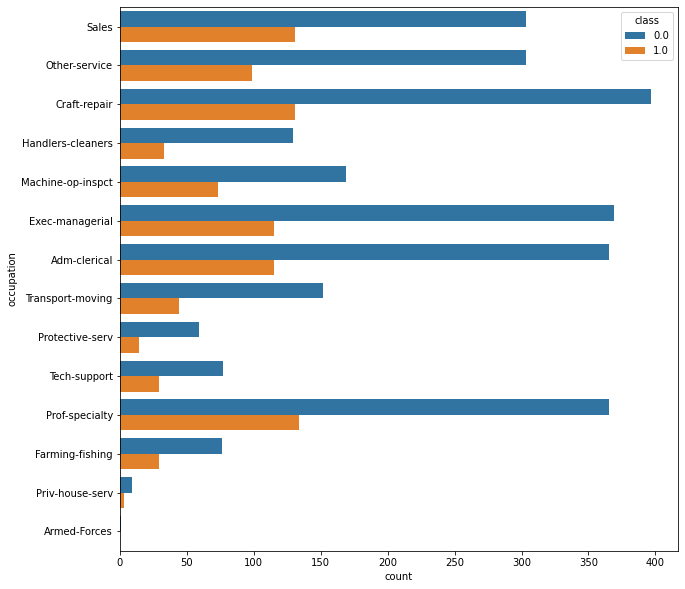

In [39]:
univariate_categ_to_class(data, "occupation", figsize=(10,10))

In [40]:
get_percent_of_class_in_attr(data, "occupation")

Machine-op-inspct    0.300412
Sales                0.299771
Tech-support         0.273585
Farming-fishing      0.273585
Prof-specialty       0.266932
Priv-house-serv      0.250000
Craft-repair         0.248106
Other-service        0.245658
Adm-clerical         0.239583
Exec-managerial      0.237113
Transport-moving     0.223350
Handlers-cleaners    0.203704
Protective-serv      0.191781
Armed-Forces         0.000000
dtype: float64

#### income

In [41]:
data["income"].unique()

array(['>50K', ' <=50K', ' >50K', '<=50K', nan], dtype=object)

In [42]:
data["income"] = data["income"].apply(lambda row: row.strip() if row is not np.nan else row)

data["income"].unique()

array(['>50K', '<=50K', nan], dtype=object)

<=50K    3002
>50K      970
Name: income, dtype: int64


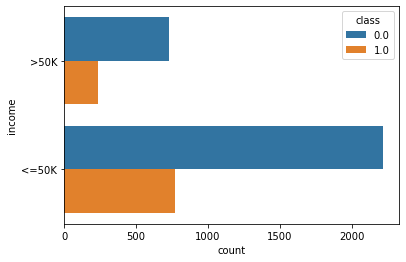

In [43]:
univariate_categ_to_class(data, "income")

In [44]:
get_percent_of_class_in_attr(data, "income")

<=50K    0.256496
>50K     0.246392
dtype: float64

#### fnlwgt

count      3969.000000
mean     188712.373898
std      102553.561943
min       19847.000000
25%      118551.000000
50%      178922.000000
75%      234743.000000
max      806316.000000
Name: fnlwgt, dtype: float64
Skewness: 1.1387625896901103
Kurtosis: 2.705120304969035


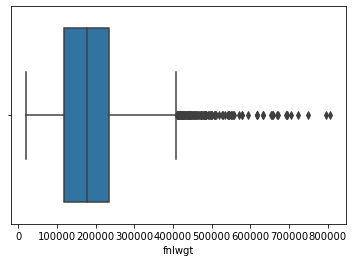

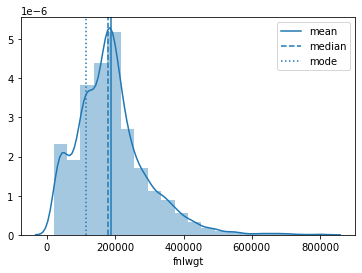

In [45]:
univariate_num(data, "fnlwgt")

Korelacia medzi nasim atributom a y: -0.01147791566611556


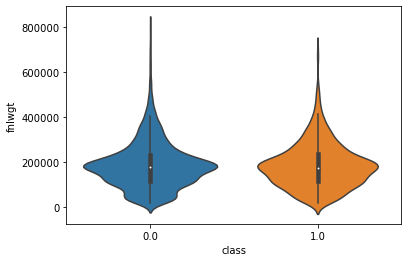

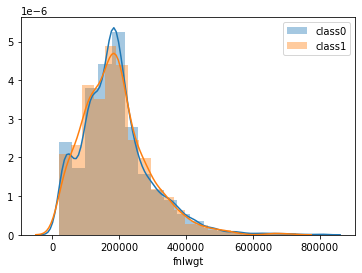

In [46]:
univariate_num_to_class(data, "fnlwgt")

#### workclass

In [47]:
data["workclass"].unique()

array([' Self-emp-inc', ' ?', ' Private', ' Self-emp-not-inc',
       ' Federal-gov', ' State-gov', ' Local-gov', nan, ' Never-worked',
       ' Without-pay'], dtype=object)

In [48]:
data["workclass"] = data["workclass"].apply(lambda row: row.strip() if row is not np.nan else row)
data["workclass"] = data["workclass"].apply(lambda row: np.nan if row == "?" else row)

data["workclass"].unique()

array(['Self-emp-inc', nan, 'Private', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Local-gov', 'Never-worked', 'Without-pay'],
      dtype=object)

Private             2782
Self-emp-not-inc     296
Local-gov            257
State-gov            145
Self-emp-inc         132
Federal-gov          119
Never-worked           2
Without-pay            1
Name: workclass, dtype: int64


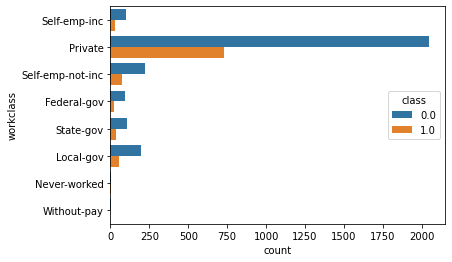

In [49]:
univariate_categ_to_class(data, "workclass")

In [50]:
get_percent_of_class_in_attr(data, "workclass")

Never-worked        0.500000
Private             0.262401
State-gov           0.262069
Self-emp-not-inc    0.243243
Federal-gov         0.218487
Local-gov           0.217899
Self-emp-inc        0.212121
Without-pay         0.000000
dtype: float64

#### hours-per-week

count    3968.000000
mean       40.323337
std        12.086865
min         2.000000
25%        40.000000
50%        40.000000
75%        45.000000
max        99.000000
Name: hours-per-week, dtype: float64
Skewness: 0.2478814975231514
Kurtosis: 2.888095246759577


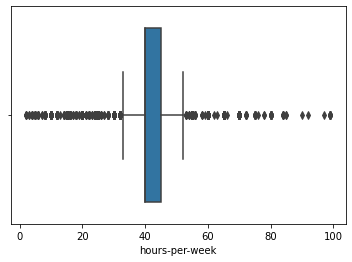

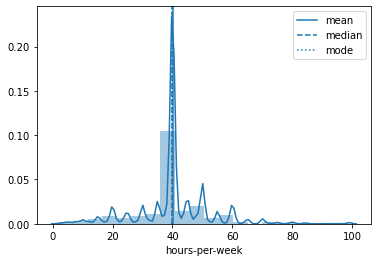

In [51]:
univariate_num(data, "hours-per-week")

Korelacia medzi nasim atributom a y: -0.021488043150210905


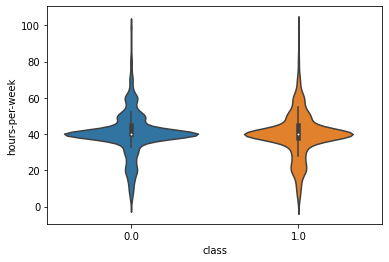

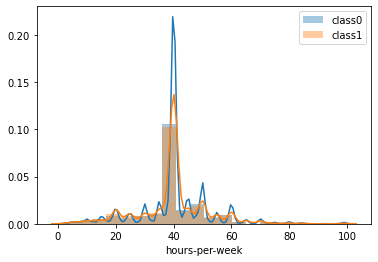

In [52]:
univariate_num_to_class(data, "hours-per-week")

#### capital-gain

<AxesSubplot:xlabel='capital-gain'>

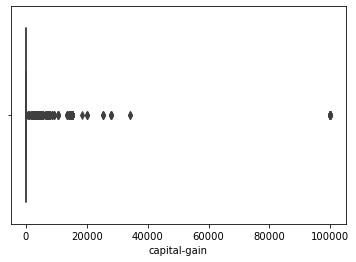

In [53]:
sns.boxplot(data["capital-gain"])

In [54]:
len(data)

3983

Ako mozno vidiet, toto sa ani neoplati rozoberat, lebo skoro vsetky zaznamy maju 0, co moze sice znamenat nieco, ale skor si myslim, ze len je to nejaka null hodnota

In [55]:
print(((data["capital-gain"] == 0) & (data["capital-loss"] == 0)).sum())
print(((data["capital-gain"] > 0) & (data["capital-loss"] == 0)).sum())
print(((data["capital-gain"] == 0) & (data["capital-loss"] > 0)).sum())

3452
318
185


In [56]:
print((data["capital-gain"] == 0).sum())
(data["capital-gain"] == 0).sum() / len(data)

3651


0.9166457444137585

Pre kompletnost mozem sa zaoberat tymi zaznamami, ktore su nenulove, no i ked by som tam nieco zaujimaveho nasiel, je tu velmi vela nulovych hodnot, ktore nemam ako optimalne vyplnit...

Rychlo este skontrolujeme, ci nahodou nie je nejaka zavislost medzi nulovymi hodnotami a prediction y, no pochybujem...
Ocakavame okolo 90% ludi z oboch kategorii, aby mali 0 capital-gain

In [57]:
print("Pocet cukrovkarov s capital-gain = 0:", len(data[(data["capital-gain"] == 0) & (data["class"] == 1)]))
print("Pocet nie-cukrovkarov s capital-gain = 0:", len(data[(data["capital-gain"] == 0) & (data["class"] == 0)]))

print("Pocet cukrovkarov:", (data["class"] == 1).sum())
print("Pocet nie-cukrovkarov:", (data["class"] == 0).sum())

Pocet cukrovkarov s capital-gain = 0: 940
Pocet nie-cukrovkarov s capital-gain = 0: 2694
Pocet cukrovkarov: 1012
Pocet nie-cukrovkarov: 2953


Obi dve hodnoty reprezentuju okolo 90% ludi z kazdej kategorie... Takze tam nie nic, ako sme ocakavali

In [58]:
no_zeros = data[data["capital-gain"] != 0]


count      319.000000
mean     12503.551724
std      21573.772145
min        594.000000
25%       3411.000000
50%       6723.000000
75%      13550.000000
max      99999.000000
Name: capital-gain, dtype: float64
Skewness: 3.545317021051369
Kurtosis: 11.537771038444975


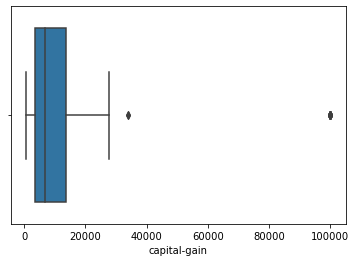

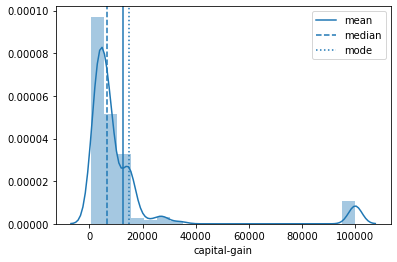

In [59]:
univariate_num(no_zeros, "capital-gain")

Korelacia medzi nasim atributom a y: 0.0003043223551130257


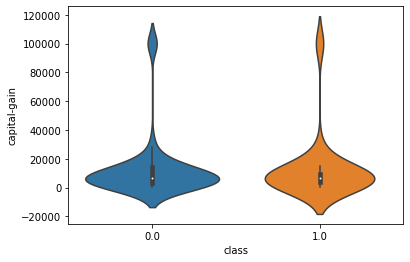

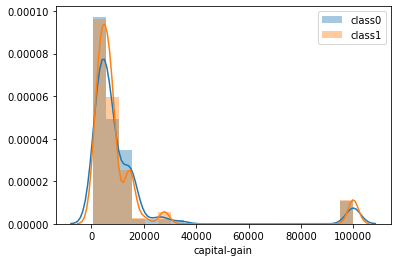

In [60]:
univariate_num_to_class(no_zeros, "capital-gain")

#### capital-loss

Ako pri capital-gain, je tu velke mnozstvo nul...

<AxesSubplot:xlabel='capital-loss'>

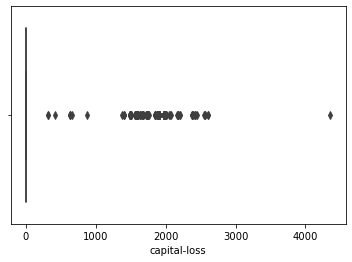

In [61]:
sns.boxplot(data=data, x="capital-loss")

In [62]:
print((data["capital-loss"] == 0).sum())
(data["capital-loss"] == 0).sum() / len(data)

3782


0.9495355259854381

In [63]:
print("Pocet cukrovkarov s capital-loss = 0:", len(data[(data["capital-loss"] == 0) & (data["class"] == 1)]))
print("Pocet nie-cukrovkarov s capital-loss = 0:", len(data[(data["capital-loss"] == 0) & (data["class"] == 0)]))

print("Pocet cukrovkarov:", (data["class"] == 1).sum())
print("Pocet nie-cukrovkarov:", (data["class"] == 0).sum())

Pocet cukrovkarov s capital-loss = 0: 963
Pocet nie-cukrovkarov s capital-loss = 0: 2806
Pocet cukrovkarov: 1012
Pocet nie-cukrovkarov: 2953


Znova 0 pre capital-loss nic neznamena, este sa pozrieme na nenulove hodnoty

In [64]:
no_zeros = data[data["capital-loss"] != 0]
len(no_zeros)

201

count     185.000000
mean     1830.464865
std       416.937150
min       323.000000
25%      1628.000000
50%      1887.000000
75%      1977.000000
max      4356.000000
Name: capital-loss, dtype: float64
Skewness: 0.1625630032149936
Kurtosis: 9.17948139722285


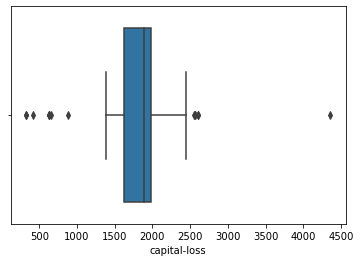

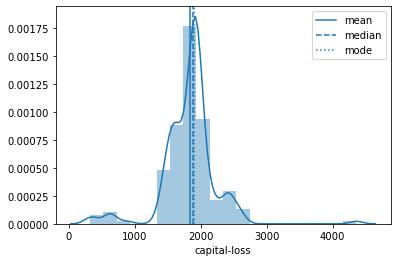

In [65]:
univariate_num(no_zeros, "capital-loss")

Korelacia medzi nasim atributom a y: 0.0020948548109055395


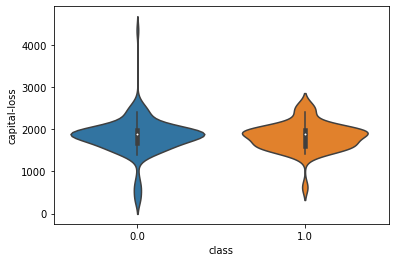

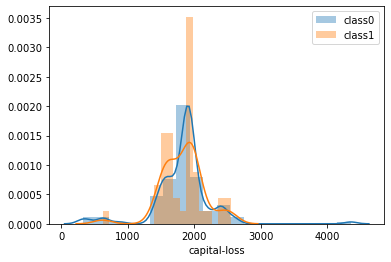

In [66]:
univariate_num_to_class(no_zeros, "capital-loss")

### medical_info

Ako mozno vidiet, tak v tomto atribute su skryte 4 atributy funkcie mnozstva kyslika, konkretne:
- mean
- std
- skewness
- kurtosis

Ma to tvar JSONu

In [67]:
data["mean_oxygen"] = np.nan
data["std_oxygen"] = np.nan
data["kurtosis_oxygen"] = np.nan
data["skewness_oxygen"] = np.nan

In [68]:
data["medical_info"].isna().sum()

18

In [69]:
def get_oxygen_stats(row):
    
    string = row["medical_info"]
    
    if string is np.nan:
        return row
    
    string = string.replace("\'", "\"")
    di = json.loads(string)
    
    for k in di.keys():
        row[k] = float(di[k])
        
    return row

data = data.apply(get_oxygen_stats, axis=1)

In [70]:
print("Pocet chybajucich merani:", data["medical_info"].isna().sum())

print(data["mean_oxygen"].isna().sum())
print(data["std_oxygen"].isna().sum())
print(data["kurtosis_oxygen"].isna().sum())
print(data["skewness_oxygen"].isna().sum())

Pocet chybajucich merani: 18
18
18
18
18


#### mean_oxygen

Z tychto chybajucich hodnot sa da vycitat, ze pokial existoval zaznam medical_info, tak vzdy obsahoval 4 hodnoty danych atributov, teda neboli zaznamy, ktore mali 3 a menej, inac by sme teraz ich nasli

count    3965.000000
mean       18.436913
std        34.699163
min         0.213211
25%         2.069398
50%         3.237458
75%        12.647993
max       217.371238
Name: mean_oxygen, dtype: float64
Skewness: 2.629338039722884
Kurtosis: 6.570659638187301


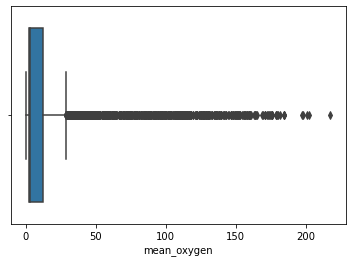

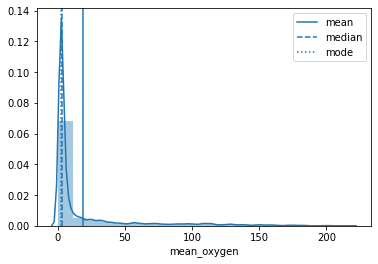

In [71]:
univariate_num(data, "mean_oxygen")

Korelacia medzi nasim atributom a y: 0.5171446494998428


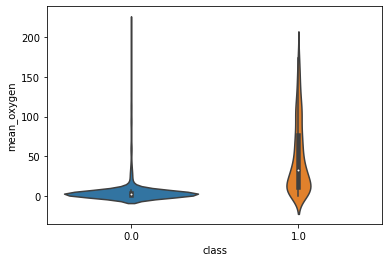

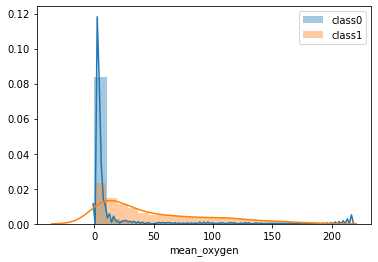

c:\users\marcel\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


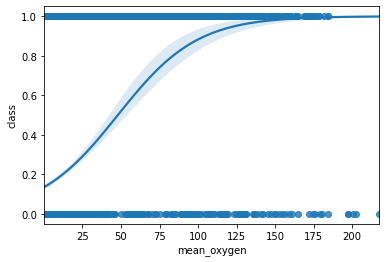

In [72]:
univariate_num_to_class(data, "mean_oxygen")

In [73]:
data[data["class"] == 0]["mean_oxygen"].describe()

count    2940.000000
mean        7.949071
std        21.940569
min         0.213211
25%         1.840719
50%         2.604097
75%         4.148411
max       217.371238
Name: mean_oxygen, dtype: float64

In [74]:
data[data["class"] == 1]["mean_oxygen"].describe()

count    1008.000000
mean       49.150598
std        45.400305
min         0.486622
25%        12.120819
50%        32.540552
75%        77.149666
max       184.525920
Name: mean_oxygen, dtype: float64

#### std_oxygen

count    3965.000000
mean       31.174690
std        22.260027
min         7.370432
25%        15.065441
50%        20.594663
75%        43.253607
max       110.642211
Name: std_oxygen, dtype: float64
Skewness: 1.2001285748384394
Kurtosis: 0.22394821030145895


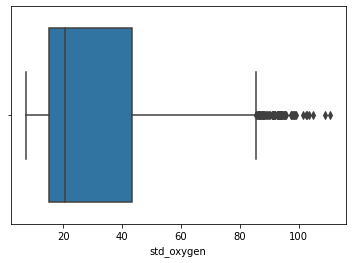

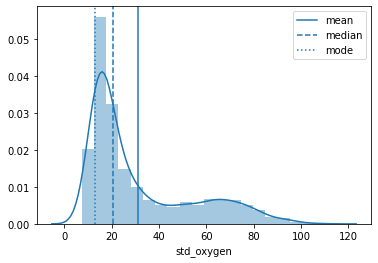

In [75]:
univariate_num(data, "std_oxygen")

Korelacia medzi nasim atributom a y: 0.6487169549813234


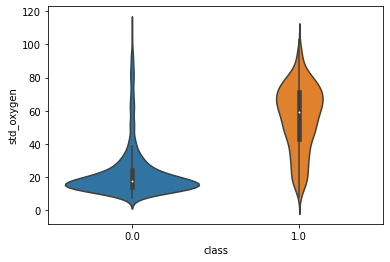

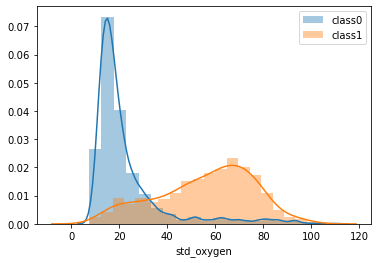

c:\users\marcel\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


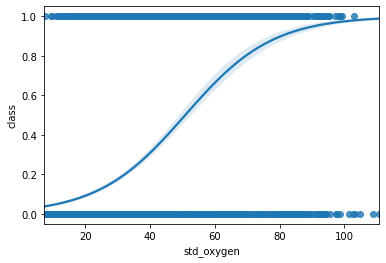

In [76]:
univariate_num_to_class(data, "std_oxygen")

Ako mozme vidiet, tak cukrovkari maju okrem toho, ze viac kyslika v krvi, tak aj nestabilnejsiu hladinu

#### kurtosis_oxygen

count    3965.000000
mean        7.405534
std         4.803379
min        -2.597872
25%         3.631537
50%         7.771753
75%        10.258976
max        34.539844
Name: kurtosis_oxygen, dtype: float64
Skewness: 0.601016622919238
Kurtosis: 1.4111487019490658


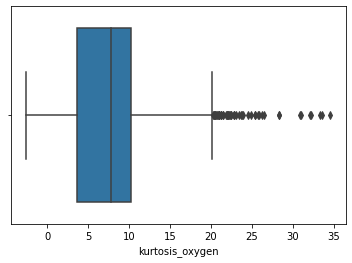

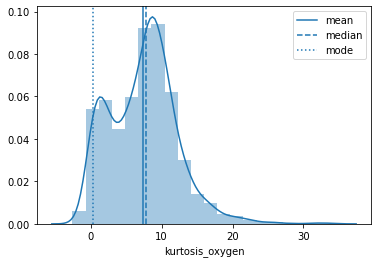

In [77]:
univariate_num(data, "kurtosis_oxygen")

Korelacia medzi nasim atributom a y: -0.5567495927644545


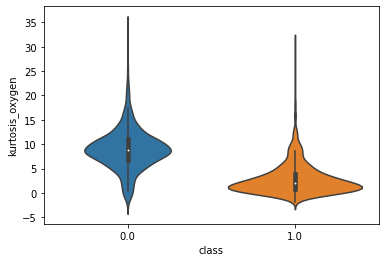

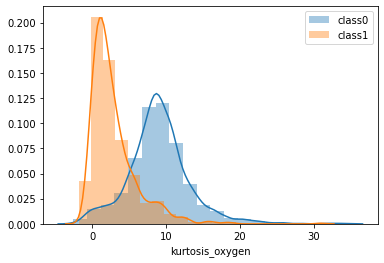

c:\users\marcel\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


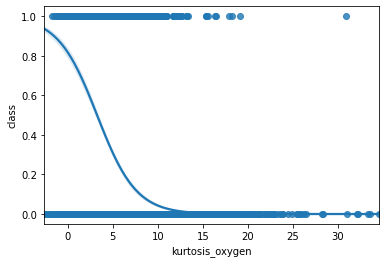

In [78]:
univariate_num_to_class(data, "kurtosis_oxygen")

Toto bolo ocakavane, kedze cukrovkari maju velky std, tak teda dana distribucia bude malo spicata, oproti nie-cukrovkarom, ktori maju stabilnu konkretnu hodnotu hladiny kyslika v krvi (male std)

#### skewness_oxygen

count    3965.000000
mean       91.046280
std       108.251236
min        -1.976976
25%        12.855779
50%        68.299049
75%       126.739185
max      1191.000837
Name: skewness_oxygen, dtype: float64
Skewness: 3.188876061889201
Kurtosis: 18.480512754832816


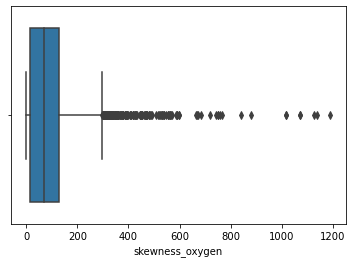

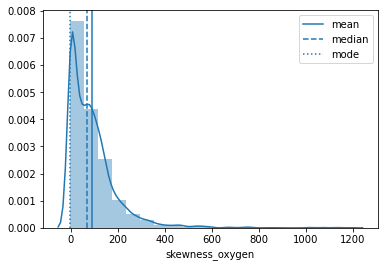

In [79]:
univariate_num(data, "skewness_oxygen")

Korelacia medzi nasim atributom a y: -0.3912290395173166


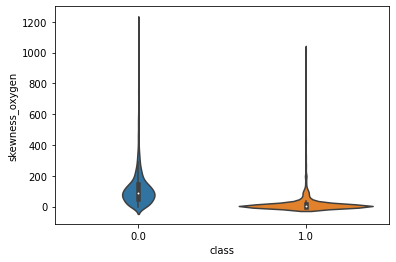

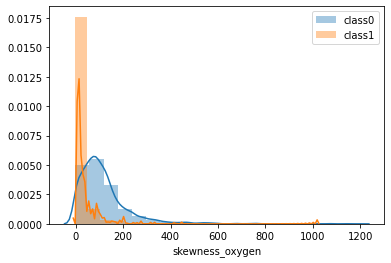

In [80]:
univariate_num_to_class(data, "skewness_oxygen")

## Bivariate Analyza

In [81]:
def bivar_2nums(data, x, y, hue="class", figsize=None):
    clean = data.loc[(data[x].notna()) & (data[y].notna())]
    
    cor = stats.pearsonr(clean[x], clean[y])[0]
    print("Pearsonova korelacia:", cor)
    
    f(figsize)
    sns.scatterplot(data=data, x=x, y=y, hue="class")
    plt.show()
    
    if cor >= 0.7 or cor <= -0.7:

        regress = stats.linregress(clean[x], clean[y])
        print(regress)
        
        f(figsize)
        sns.regplot(data[x], data[y])
        plt.show()

def bivar_2cats(data, x, y, show_hue=False, hue="class", countplot=False, figsize=None):
    
    if show_hue == False:
    
        table = data.groupby(by=[y])[x].value_counts()
        table = table.unstack().fillna(0).astype("int32")
        
    else:
        
        table = data.groupby(by=[y,x])[hue].value_counts()
        table = table.unstack().unstack().fillna(0).astype("int32")
        
    
    f(figsize)
    sns.heatmap(data=table, cmap="Blues", annot=True, fmt="d")
    plt.show()
    
    if countplot == True:
        
        f(figsize)
        sns.countplot(data=data, x=x, hue=y)
        plt.show()
    

def bivar_numcat(data, num, cat, hue="class", distplot=False, figsize=None):
    
    f(figsize)
    sns.boxplot(data=data, x=cat, y=num)
    plt.show()
    
    f(figsize)
    sns.violinplot(data=data, x=cat, y=num, hue=hue)
    plt.show()
    
    if distplot == True:
        
        f(figsize)
        
        for c in data[cat].unique():
            if c is np.nan:
                continue
                
            sns.distplot(data[data[cat] == c][num], label=cat + ":" + c)
    
        plt.legend()
        plt.show()

- age - glucose_mean -> cim starsi, tym viac cukru v krvi?
- age - oxygen_mean -> cim starsi, tym viac kyslika v krvi?
- sex - glucose_mean -> to iste, lenze pre pohlavie
- sex - oxygen_mean
- sex - workclass
- sex - hours-per-week
- sex - income
- marital-status - relationship
- hours-per-week - income
- hours-per-week - workclass

__________

- ja este pohladam korelaciu pre fnlwgt

__________________

- este spravim pairplot a heatmapu korelacii pre vsetkych 8 atributov okolo merani

Na analyzu atributov, ktore su v rozdielnych data framoch, je potrebne ich joinut. Problemom vsak je, ze nemame idealny atribut, podla ktorych ich mozeme joinut. Je mozne ich joinut na zaklade mena, i ked to nie je idealne, lebo v prvom rade, co by sme spravili, keby sme mali viacero pacientov s rovnakymi menami? Este je mozne pouzit ako index kombinaciu atributov mena a adresy, no stale, toto nie je spravny approach, akym by sme chceli joinovat data. Idealne by mal existovat nejake idcko, podla ktoreho by sa data joinuli, avsak v obidvoch dataframoch sa pouziva iny index.

Druhym problemom, ktory nachadzame vo vacsom dataframe je, ze existuje viacero zaznamom pre konkretneho cloveka. Konkretne existuje 50 duplikatov, kedy pacient ma prave 2 zaznamy. Po nahladnuty do zaznamov sme si vsimli, ze ono to vyzera, ze ako keby boli nechcene splitnute dane data medzi dane 2 zaznamy. Niektore namerane hodnoty su nachlp presne, co len posilnuje trvdenie, ze ide o rovnakeho pacienta.

Na teraz nie je potrebne dane zaznamy mergovat, no toto je jedna z veci, ktore budeme musiet pocas druhej fazy projektu spravit.

POTOM JE POTREBNE SKONTROLOVAT, CI NAOZAJ SU ROVNAKE MENA PACIENTOV (TO UZ SOM KONTROLOVAL, POKIAL SA NEMYLIM), AKO AJ ADRESY

In [82]:
print(len(df1))
df1["name"].nunique() == len(df1)

3933


True

In [83]:
print(df2["name"].nunique() == len(df2))
df2["name"].describe()

False


count                3983
unique               3933
top       Kenneth Mcnulty
freq                    2
Name: name, dtype: object

In [84]:
df1_ = df1.set_index("name").drop(columns=["address"])
df2_ = df2.set_index("name")
data = df2_.join(df1_, how="left").reset_index()
data

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,...,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass,age,sex,date_of_birth
0,Aaron Davis,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",White,Divorced,Other-service,f,3.0,Not-in-family,0.248354,119.7890625,...,41.806596,<=50K,"{'mean_oxygen':'1.647157191','std_oxygen':'14....",?,45.0,0.0,Local-gov,56,Female,1962-12-27
1,Aaron Dini,"105 Medina Springs Suite 462\r\nEmilyland, KS ...",White,Divorced,Sales,f,10.0,Not-in-family,-0.416735,NaN,...,53.615229,<=50K,"{'mean_oxygen':'1.380434783','std_oxygen':'15....",United-States,40.0,0.0,Self-emp-not-inc,50,Male,1969-05-22
2,Aaron Gann,59685 Thomas Extension Apt. 142\r\nFieldsborou...,Black,Never-married,?,f,4.0,Other-relative,-0.118753,NaN,...,50.476073,<=50K,"{'mean_oxygen':'78.30183946','std_oxygen':'79....",United-States,30.0,0.0,?,25,Male,1994-07-26
3,Aaron Gregg,"10883 Williams Locks Suite 821\r\nEast Carmen,...",Black,Widowed,Transport-moving,f,9.0,Not-in-family,2.232677,104.8203125,...,35.976649,<=50K,"{'mean_oxygen':'1.489130435','std_oxygen':'10....",United-States,40.0,0.0,Local-gov,42,Female,1977-04-16
4,Aaron Lindley,"564 Stevenson Park Apt. 839\r\nRodriguezville,...",White,Never-married,Sales,F,9.0,Own-child,-0.154086,134.84375,...,54.280153,<=50K,"{'mean_oxygen':'1.194816054','std_oxygen':'11....",United-States,40.0,0.0,Private,-4900,Female,1969-12-11 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,Young Provines,"7993 Sharon Roads Suite 311\r\nPort Daniel, GA...",White,Married-civ-spouse,Exec_managerial,FALSE,11.0,Husband,0.087649,114.8515625,...,44.303479,>50K,"{'mean_oxygen':'3.16722408','std_oxygen':'22.3...",United-States,43.0,0.0,Private,51,Male,1968-05-19
3979,Zachary Grandfield,"77606 Maxwell Rest Apt. 485\r\nPort Jennifer, ...",Black,Married-civ-spouse,Transport-moving,f,10.0,Husband,19.188118,50.3671875,...,29.456767,<=50K,"{'mean_oxygen':'2.994147157','std_oxygen':'21....",United-States,40.0,0.0,Private,-5800,Male,1960/12/18
3980,Zachary Miller,"96654 Marc Stream\r\nEast Cassandra, VT 84597",White,Married-civ-spouse,Adm-clerical,f,13.0,Husband,-0.023296,130.0,...,43.191434,>50K,"{'mean_oxygen':'1.62541806','std_oxygen':'14.0...",?,50.0,1902.0,Private,46,Male,1973-08-07
3981,Zachary Seltzer,"38371 Crystal Stravenue\r\nPerkinsmouth, DE 20764",White,Divorced,Sales,f,7.0,Not-in-family,19.777657,48.5078125,...,34.132553,<=50K,"{'mean_oxygen':'66.53260870000001','std_oxygen...",United-States,40.0,0.0,Private,64,Female,1955-06-08 00 00 00


### age - mean_glucose

In [85]:
print("Pocet zapornych hodnot:", (data["age"] < 0).sum())
neg_age = data["age"][(data["age"] < 0)]
neg_age

Pocet zapornych hodnot: 200


4      -4900
20     -3700
44     -5200
47     -5800
58     -5200
        ... 
3849   -3900
3855   -5600
3928   -5900
3951   -5600
3979   -5800
Name: age, Length: 200, dtype: int64

<AxesSubplot:xlabel='age'>

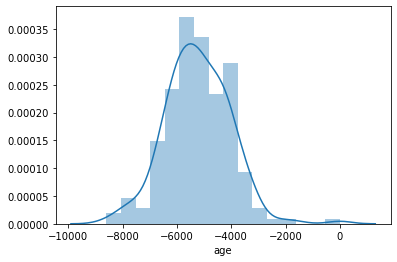

In [86]:
sns.distplot(neg_age)

<AxesSubplot:xlabel='age'>

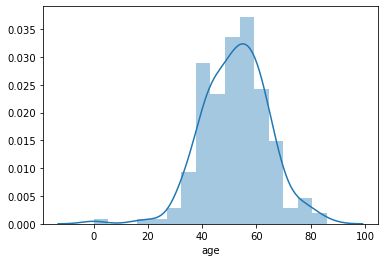

In [87]:
neg_age = neg_age / -100
sns.distplot(neg_age)

Pocet normalnych hodnot: 3577


<AxesSubplot:xlabel='age'>

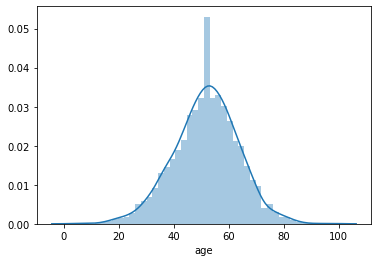

In [88]:
print("Pocet normalnych hodnot:", ((data["age"] > 0) & (data["age"] <= 100)).sum())
norm_age = data["age"][(data["age"] > 0) & (data["age"] <= 100)]
sns.distplot(norm_age)

Pocet velkych kladnych hodnot: 206


<AxesSubplot:xlabel='age'>

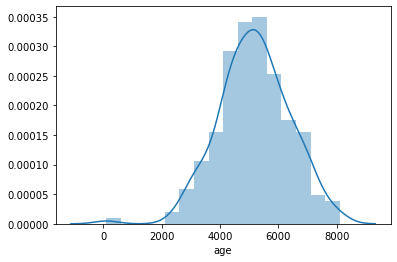

In [89]:
print("Pocet velkych kladnych hodnot:", (data["age"] > 100).sum())
pos_age = data["age"][data["age"] > 100]
sns.distplot(pos_age)

In [90]:
print(len(neg_age) + len(norm_age) + len(pos_age) == len(data))

True


<AxesSubplot:xlabel='age'>

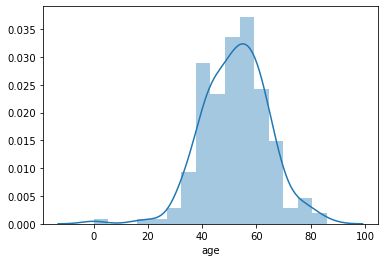

In [91]:
pos_age = pos_age / 100
sns.distplot(neg_age)

In [92]:
data["correct_age"] = data["age"].copy()

In [93]:
def fix_age(row):
    vek = row["age"]
    
    if vek < 0: 
        row["correct_age"] = vek / -100
    elif vek > 100:
        row["correct_age"] = vek / 100
        
    return row
    

data = data.apply(fix_age, axis=1)
data

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,...,income,medical_info,native-country,hours-per-week,capital-loss,workclass,age,sex,date_of_birth,correct_age
0,Aaron Davis,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",White,Divorced,Other-service,f,3.0,Not-in-family,0.248354,119.7890625,...,<=50K,"{'mean_oxygen':'1.647157191','std_oxygen':'14....",?,45.0,0.0,Local-gov,56,Female,1962-12-27,56.0
1,Aaron Dini,"105 Medina Springs Suite 462\r\nEmilyland, KS ...",White,Divorced,Sales,f,10.0,Not-in-family,-0.416735,NaN,...,<=50K,"{'mean_oxygen':'1.380434783','std_oxygen':'15....",United-States,40.0,0.0,Self-emp-not-inc,50,Male,1969-05-22,50.0
2,Aaron Gann,59685 Thomas Extension Apt. 142\r\nFieldsborou...,Black,Never-married,?,f,4.0,Other-relative,-0.118753,NaN,...,<=50K,"{'mean_oxygen':'78.30183946','std_oxygen':'79....",United-States,30.0,0.0,?,25,Male,1994-07-26,25.0
3,Aaron Gregg,"10883 Williams Locks Suite 821\r\nEast Carmen,...",Black,Widowed,Transport-moving,f,9.0,Not-in-family,2.232677,104.8203125,...,<=50K,"{'mean_oxygen':'1.489130435','std_oxygen':'10....",United-States,40.0,0.0,Local-gov,42,Female,1977-04-16,42.0
4,Aaron Lindley,"564 Stevenson Park Apt. 839\r\nRodriguezville,...",White,Never-married,Sales,F,9.0,Own-child,-0.154086,134.84375,...,<=50K,"{'mean_oxygen':'1.194816054','std_oxygen':'11....",United-States,40.0,0.0,Private,-4900,Female,1969-12-11 00:00:00,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,Young Provines,"7993 Sharon Roads Suite 311\r\nPort Daniel, GA...",White,Married-civ-spouse,Exec_managerial,FALSE,11.0,Husband,0.087649,114.8515625,...,>50K,"{'mean_oxygen':'3.16722408','std_oxygen':'22.3...",United-States,43.0,0.0,Private,51,Male,1968-05-19,51.0
3979,Zachary Grandfield,"77606 Maxwell Rest Apt. 485\r\nPort Jennifer, ...",Black,Married-civ-spouse,Transport-moving,f,10.0,Husband,19.188118,50.3671875,...,<=50K,"{'mean_oxygen':'2.994147157','std_oxygen':'21....",United-States,40.0,0.0,Private,-5800,Male,1960/12/18,58.0
3980,Zachary Miller,"96654 Marc Stream\r\nEast Cassandra, VT 84597",White,Married-civ-spouse,Adm-clerical,f,13.0,Husband,-0.023296,130.0,...,>50K,"{'mean_oxygen':'1.62541806','std_oxygen':'14.0...",?,50.0,1902.0,Private,46,Male,1973-08-07,46.0
3981,Zachary Seltzer,"38371 Crystal Stravenue\r\nPerkinsmouth, DE 20764",White,Divorced,Sales,f,7.0,Not-in-family,19.777657,48.5078125,...,<=50K,"{'mean_oxygen':'66.53260870000001','std_oxygen...",United-States,40.0,0.0,Private,64,Female,1955-06-08 00 00 00,64.0


In [94]:
data["mean_oxygen"] = np.nan
data["std_oxygen"] = np.nan
data["kurtosis_oxygen"] = np.nan
data["skewness_oxygen"] = np.nan

In [95]:
data = data.apply(get_oxygen_stats, axis=1)
data

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,...,capital-loss,workclass,age,sex,date_of_birth,correct_age,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Aaron Davis,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",White,Divorced,Other-service,f,3.0,Not-in-family,0.248354,119.7890625,...,0.0,Local-gov,56,Female,1962-12-27,56.0,1.647157,14.792746,10.657147,129.868327
1,Aaron Dini,"105 Medina Springs Suite 462\r\nEmilyland, KS ...",White,Divorced,Sales,f,10.0,Not-in-family,-0.416735,NaN,...,0.0,Self-emp-not-inc,50,Male,1969-05-22,50.0,1.380435,15.159241,12.617156,171.150528
2,Aaron Gann,59685 Thomas Extension Apt. 142\r\nFieldsborou...,Black,Never-married,?,f,4.0,Other-relative,-0.118753,NaN,...,0.0,?,25,Male,1994-07-26,25.0,78.301839,79.997032,0.071512,-1.929004
3,Aaron Gregg,"10883 Williams Locks Suite 821\r\nEast Carmen,...",Black,Widowed,Transport-moving,f,9.0,Not-in-family,2.232677,104.8203125,...,0.0,Local-gov,42,Female,1977-04-16,42.0,1.489130,10.412594,14.541232,304.902115
4,Aaron Lindley,"564 Stevenson Park Apt. 839\r\nRodriguezville,...",White,Never-married,Sales,F,9.0,Own-child,-0.154086,134.84375,...,0.0,Private,-4900,Female,1969-12-11 00:00:00,49.0,1.194816,11.190716,14.929069,276.348177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,Young Provines,"7993 Sharon Roads Suite 311\r\nPort Daniel, GA...",White,Married-civ-spouse,Exec_managerial,FALSE,11.0,Husband,0.087649,114.8515625,...,0.0,Private,51,Male,1968-05-19,51.0,3.167224,22.307530,7.591025,59.745587
3979,Zachary Grandfield,"77606 Maxwell Rest Apt. 485\r\nPort Jennifer, ...",Black,Married-civ-spouse,Transport-moving,f,10.0,Husband,19.188118,50.3671875,...,0.0,Private,-5800,Male,1960/12/18,58.0,2.994147,21.886316,8.284256,72.027240
3980,Zachary Miller,"96654 Marc Stream\r\nEast Cassandra, VT 84597",White,Married-civ-spouse,Adm-clerical,f,13.0,Husband,-0.023296,130.0,...,1902.0,Private,46,Male,1973-08-07,46.0,1.625418,14.089186,12.234726,177.121903
3981,Zachary Seltzer,"38371 Crystal Stravenue\r\nPerkinsmouth, DE 20764",White,Divorced,Sales,f,7.0,Not-in-family,19.777657,48.5078125,...,0.0,Private,64,Female,1955-06-08 00 00 00,64.0,66.532609,86.290187,0.942294,-0.611598


In [96]:
data["mean_glucose"] = data["mean_glucose"].apply(lambda row: np.nan if row is not np.nan and "?" in row else row)
data["mean_glucose"] = data["mean_glucose"].astype("float32")

Pearsonova korelacia: nan


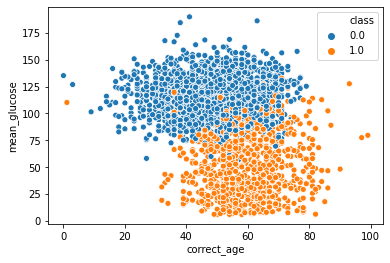

In [97]:
bivar_2nums(data, "correct_age", "mean_glucose")

### age - mean_oxygen

In [98]:
data[["correct_age","mean_oxygen"]].corr()

,correct_age,mean_oxygen
correct_age,1.000000,0.186901
mean_oxygen,0.186901,1.000000


<AxesSubplot:xlabel='correct_age', ylabel='mean_oxygen'>

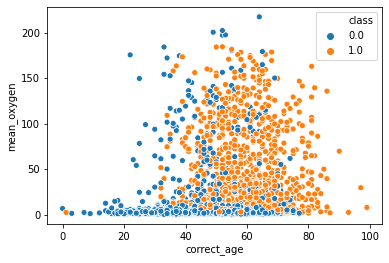

In [99]:
sns.scatterplot(data=data, x="correct_age", y="mean_oxygen", hue="class")

### sex - mean_glucose

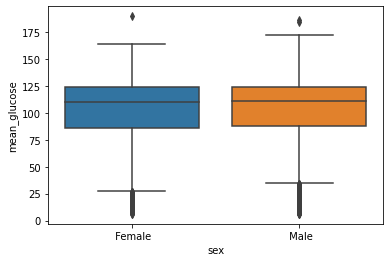

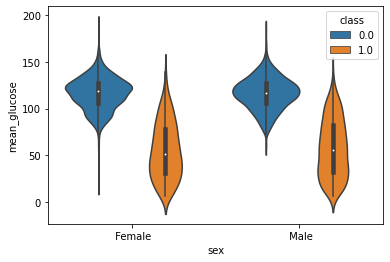

In [100]:
bivar_numcat(data, num="mean_glucose", cat="sex")

### sex - mean_oxygen

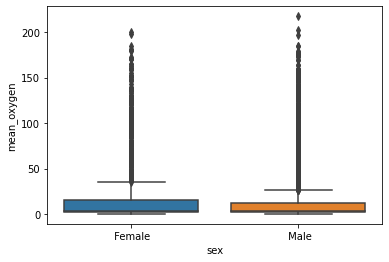

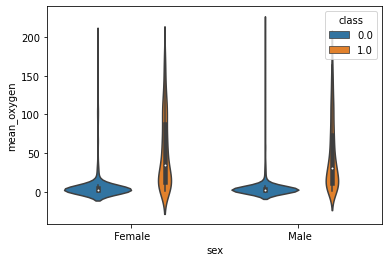

In [101]:
bivar_numcat(data=data, num="mean_oxygen", cat="sex")

### sex - workclass

In [102]:
data["workclass"]

0               Local-gov
1        Self-emp-not-inc
2                       ?
3               Local-gov
4                 Private
              ...        
3978              Private
3979              Private
3980              Private
3981              Private
3982              Private
Name: workclass, Length: 3983, dtype: object

In [103]:
data["workclass"] = data["workclass"].apply(lambda row: row.strip() if row is not np.nan else row)
data["workclass"] = data["workclass"].apply(lambda row: np.nan if row == "?" else row)
data["workclass"]

0              Local-gov
1       Self-emp-not-inc
2                    NaN
3              Local-gov
4                Private
              ...       
3978             Private
3979             Private
3980             Private
3981             Private
3982             Private
Name: workclass, Length: 3983, dtype: object

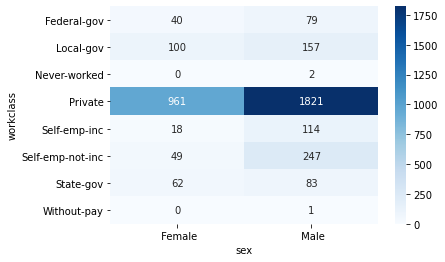

In [104]:
bivar_2cats(data, x="sex", y="workclass")

### sex - hours-per-week

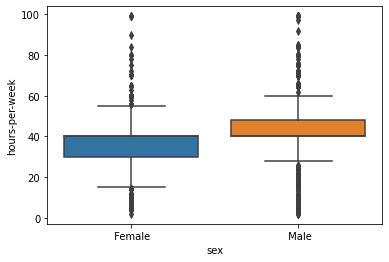

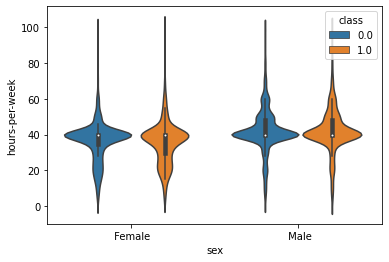

In [105]:
bivar_numcat(data=data, num="hours-per-week", cat="sex")

### sex - income

In [106]:
data["income"] = data["income"].apply(lambda row: row.strip() if row is not np.nan else row)
data["income"].value_counts()

<=50K    3002
>50K      970
Name: income, dtype: int64

In [107]:
table = data.groupby(by=["income"])["sex"].value_counts()
table = table.unstack().fillna(0).astype("int32")
table

sex,Female,Male
income,,
<=50K,1172,1830
>50K,143,827


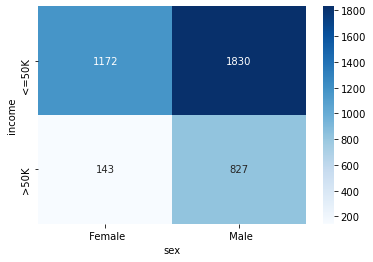

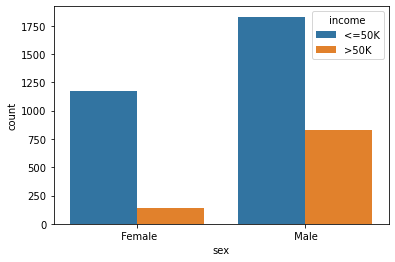

In [108]:
bivar_2cats(data=data, x="sex", y="income", countplot=True)

### marital-status - relationship

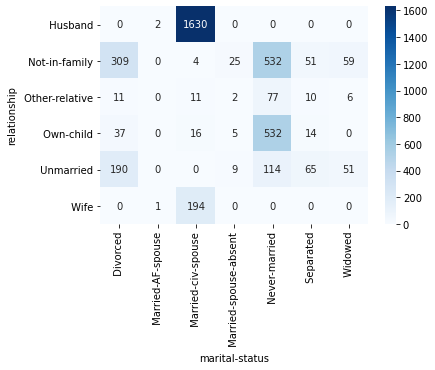

In [109]:
bivar_2cats(data=data, x="marital-status", y="relationship")

### hours-per-week - income

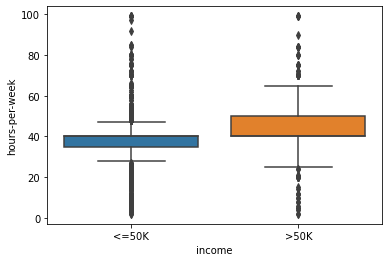

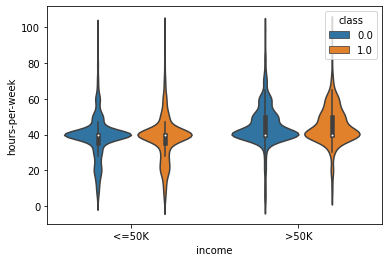

In [110]:
bivar_numcat(data=data, num="hours-per-week", cat="income")

### hours-per-week - workclass

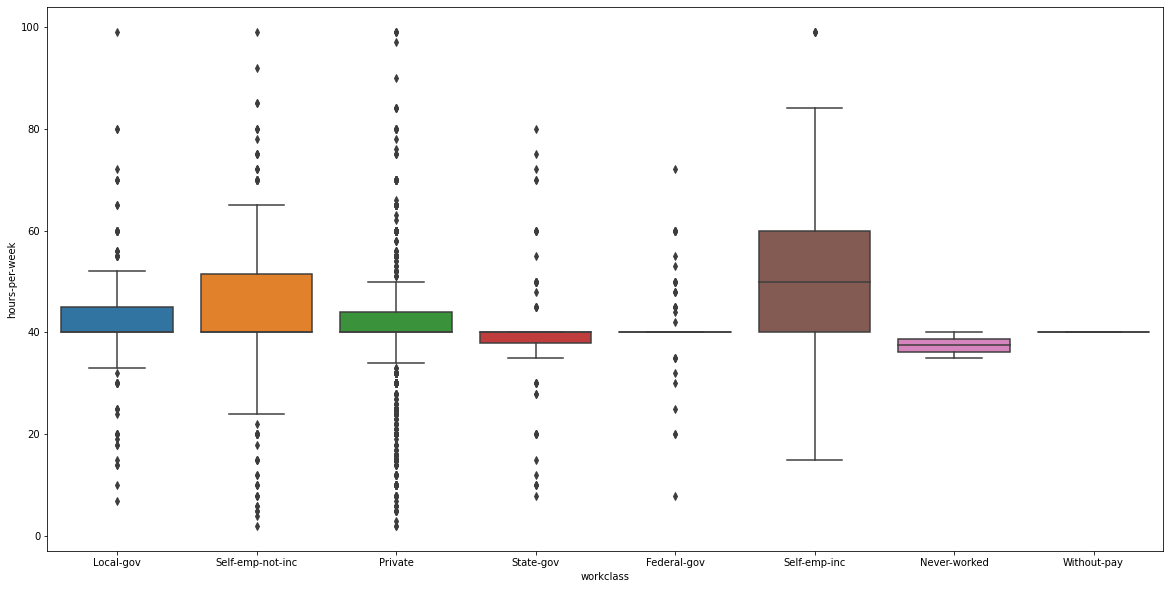

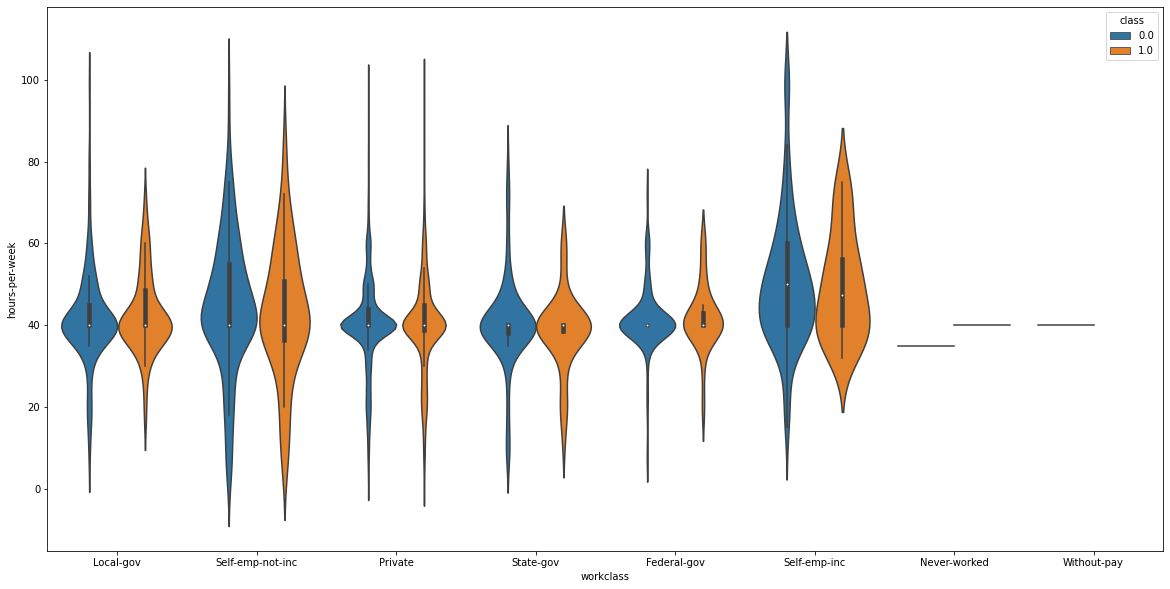

In [111]:
bivar_numcat(data=data, num="hours-per-week", cat="workclass", figsize=(20,10))

### Pairplot pre vsetky merania 

In [112]:
l = list(data.columns.values)

oxygen_measurements = []
glucose_measurements = []

for li in l:
    if "oxygen" in li:
        oxygen_measurements.append(li)
    elif "glucose" in li:
        glucose_measurements.append(li)

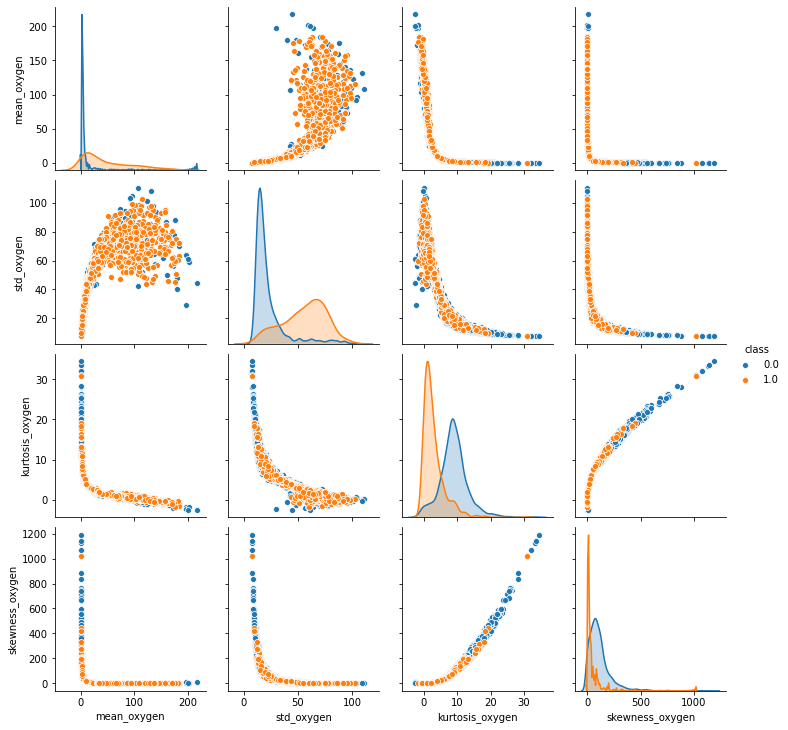

In [113]:
sns.pairplot(data=data[oxygen_measurements+["class"]],hue="class")

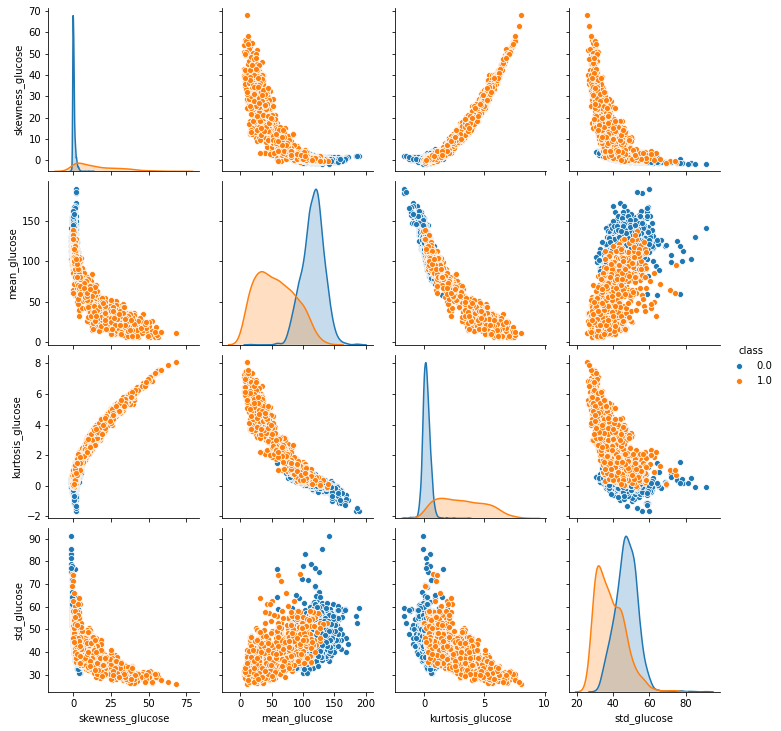

In [114]:
sns.pairplot(data=data[glucose_measurements+["class"]],hue="class")

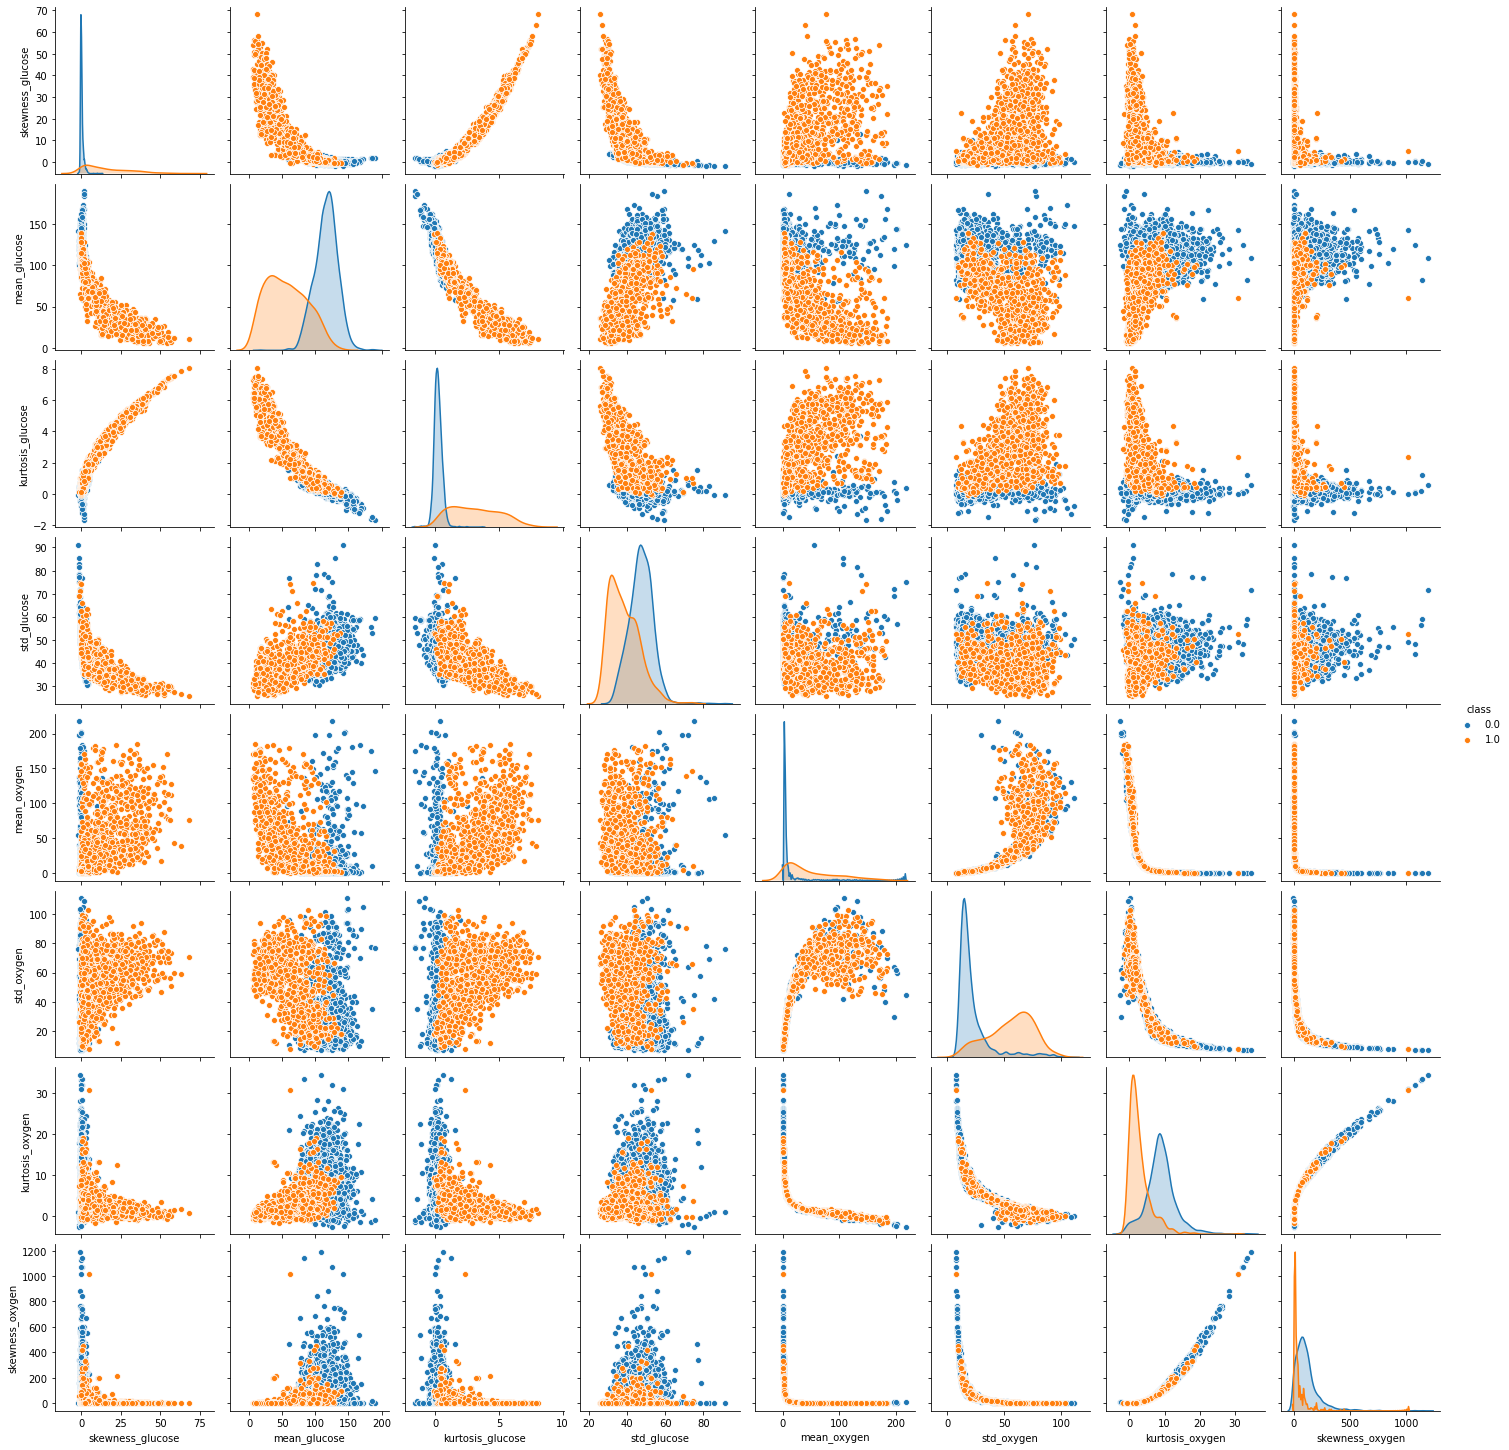

In [115]:
measurements = glucose_measurements + oxygen_measurements

sns.pairplot(data=data[measurements+["class"]],hue="class")

<AxesSubplot:>

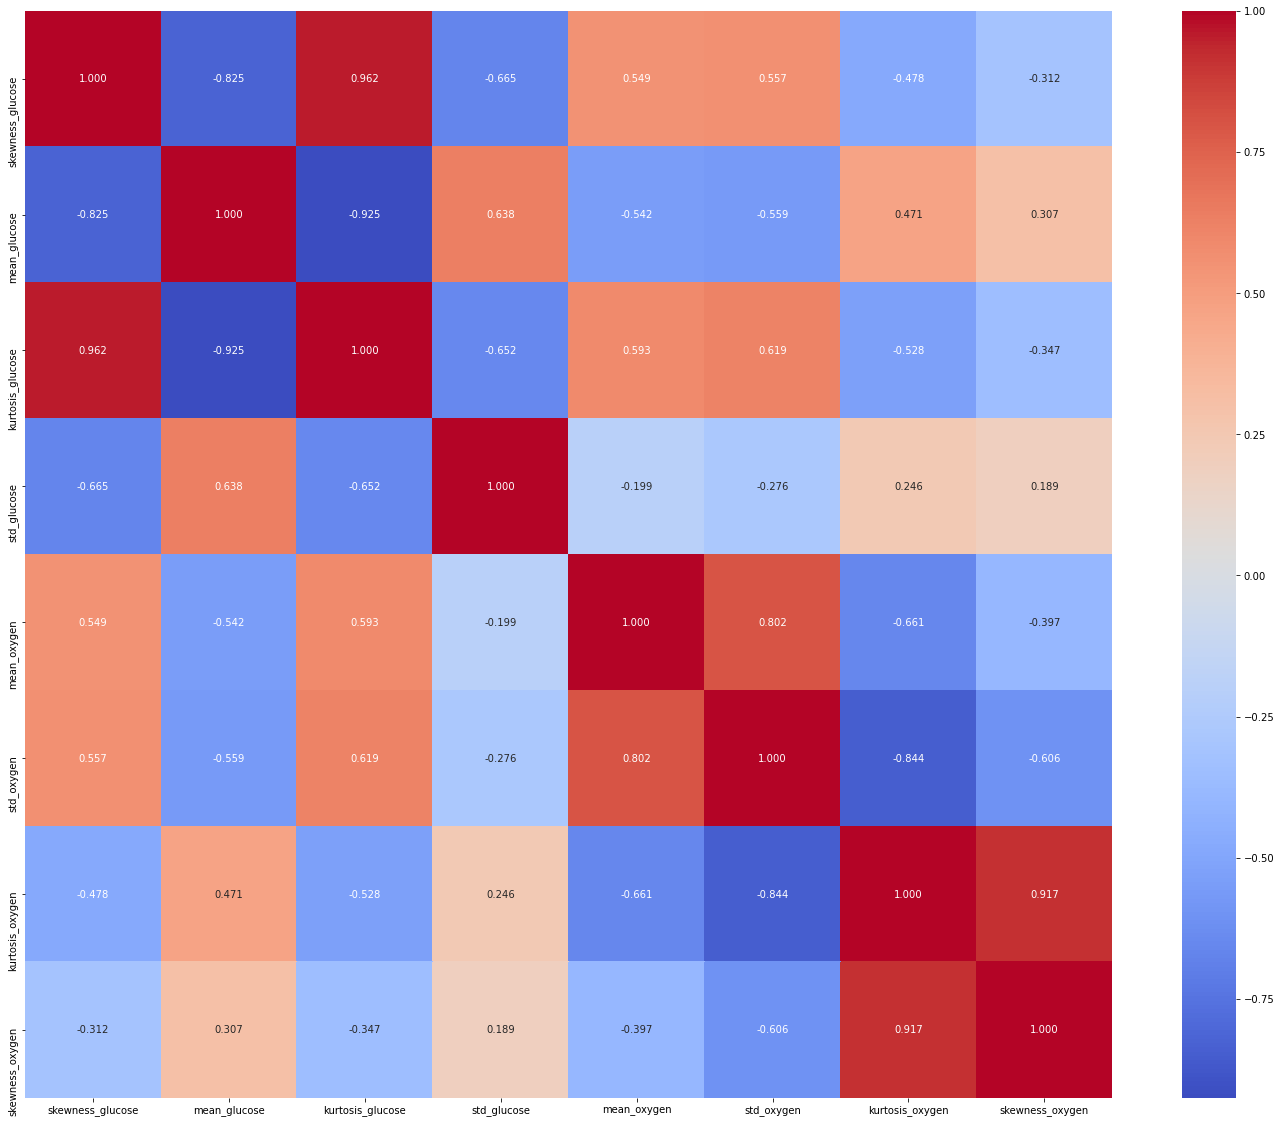

In [116]:
korelacie = data[measurements].corr()

f(figsize=(25,20))
sns.heatmap(data=korelacie, cmap="coolwarm", annot=True, fmt=".3f", square=True)

In [117]:
def heatmap_mask(data, threshold=0.4):
    data = data.copy()
    
    for i in data.index:
        clean = False
        row = data.loc[i]
        for c in data.columns:
            if i == c:
                clean = True
                
            if clean == True:
                row[c] = 1
                
            else:
                val = row[c]
                if val == 1 or val < threshold and val > -threshold:
                    row[c] = 1
                else:
                    row[c] = 0

    data = data.astype("bool")
    return data
        

<AxesSubplot:>

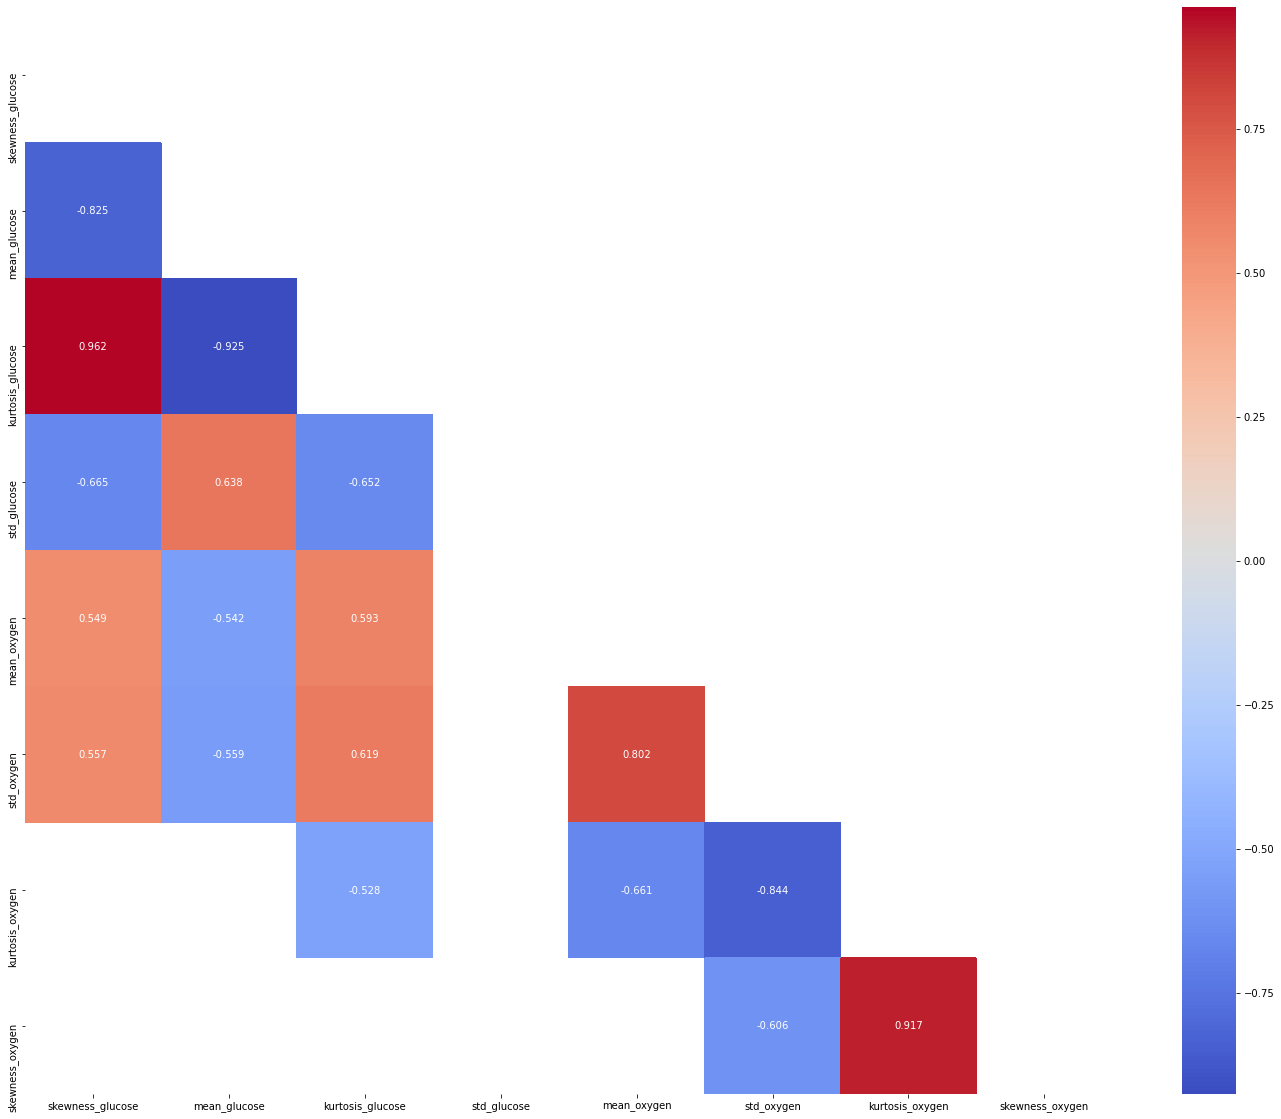

In [118]:
maska = heatmap_mask(korelacie, threshold=0.5)

f(figsize=(25,20))
sns.heatmap(data=korelacie, cmap="coolwarm", annot=True, fmt=".3f", square=True, mask=maska)

Skontrolujeme, ci sme nasli vsetky vztahy medzi ciselnymi atributmi..

In [119]:
vsetky_corr = data.corr()

#trosku to tam upracem, aby sa mi lahsie hladali korelacie

#mazem riadky, v ktorych su same slabe korelacie
riadky_nazmazanie = vsetky_corr[((vsetky_corr < 0.4) | (vsetky_corr == 1)).all()]

vsetky_corr = vsetky_corr.drop(index=riadky_nazmazanie.index)

#vymenim stlpce za riadky a znova vymazem riadky, kde su same male korelacie
vsetky_corr = vsetky_corr.stack().unstack(0)

riadky_nazmazanie = vsetky_corr[(vsetky_corr < 0.4).all(axis=1)]

vsetky_corr.drop(index=riadky_nazmazanie.index)

,skewness_glucose,mean_glucose,kurtosis_glucose,class,std_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
skewness_glucose,1.000000,-0.825420,0.962270,0.682033,-0.665383,0.549081,0.557407,-0.478045,-0.312275
mean_glucose,-0.825420,1.000000,-0.925356,-0.772707,0.637998,-0.542317,-0.558985,0.471367,0.307333
kurtosis_glucose,0.962270,-0.925356,1.000000,0.789994,-0.652319,0.593001,0.618660,-0.528262,-0.346590
class,0.682033,-0.772707,0.789994,1.000000,-0.497152,0.517145,0.648717,-0.556750,-0.391229
std_glucose,-0.665383,0.637998,-0.652319,-0.497152,1.000000,-0.198758,-0.275891,0.246243,0.189360
mean_oxygen,0.549081,-0.542317,0.593001,0.517145,-0.198758,1.000000,0.801521,-0.661245,-0.396807
std_oxygen,0.557407,-0.558985,0.618660,0.648717,-0.275891,0.801521,1.000000,-0.843715,-0.605775
kurtosis_oxygen,-0.478045,0.471367,-0.528262,-0.556750,0.246243,-0.661245,-0.843715,1.000000,0.916830
skewness_oxygen,-0.312275,0.307333,-0.346590,-0.391229,0.189360,-0.396807,-0.605775,0.916830,1.000000


Jedine relevantne korelacie medzi ciselnymi atributmi sa nachadzaju medzi atributmi merania glukozy, resp. kysliku, ako aj medzi vsetkymi tymito atributmi merania a predikovanym atributom - class

# HYPOTEZY

### Hypoteza 1:

H0: Cukrovkari a nie-cukrovkari maju rovnaku priemernu hodnotu kysliku v krvi

H1: Cukrovkari a nie-cukrovkari maju odlisnu priemernu hodnotu kysliku v krvi

In [120]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

def cohen_d(x, y):
    len_x = len(x)
    len_y = len(y)
    s = np.sqrt(((len_x-1) * np.std(x, ddof=1)**2 
                 + (len_y-1) * np.std(y, ddof=1)**2) / (len_x + len_y - 2))
    d = (np.abs(np.mean(x) - np.mean(y))) / s
    return d

In [121]:
def test_normality(data, attr, hue, hue_values, clean_outliers_multiple_times=False, distplot=True):
    
    distributions = []
    names = []
    
    for h in hue_values:
        distributions.append(data.loc[(data[hue] == h) & (data[attr].notna())][attr])
        names.append(attr + "(" + hue + "=" + str(h) + ")")
    
    for i in range(len(hue_values)):
        while len(identify_outliers(distributions[i])) > 0:
            distributions[i] = distributions[i].drop(index=identify_outliers(distributions[i]).index)
            if clean_outliers_multiple_times == False:
                break

        sm.ProbPlot(distributions[i], fit=True).qqplot(line='45', label=names[i])
        plt.legend()
        plt.show()
        
    for i in range(len(hue_values)):
        sns.distplot(distributions[i], label=names[i])
        
    plt.legend()
    plt.show()
    
    for i in range(len(hue_values)):
        print(names[i], "p-value:", stats.shapiro(distributions[i])[1])
    
    return distributions

In [122]:
def mann_whitney(distributions):
    pvalue = stats.mannwhitneyu(distributions[0], distributions[1])[1]

    print("Hodnota pvalue:", pvalue)
    if pvalue < 0.05:
        print("Zamietame hypotezu H0")
        
        cohen_value = cohen_d(distributions[0], distributions[1])
        
        len1 = len(distributions[0]) 
        len2 = len(distributions[1]) 

        power = sm_stats.power.tt_ind_solve_power(effect_size=cohen_value, nobs1=len1, alpha=0.05, 
                                          power=None, ratio=len2/len1)

        print("Sila testu:", power)
        
        if power > 0.8:
            print("Dostatocne velka sila testu")
        else:
            print("Nedostatocne velka sila testu")
        
    else:
        print("Nedokazeme zamietnut hypotezu H0")
    

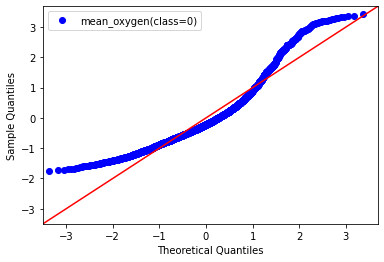

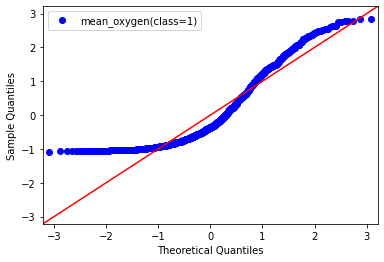

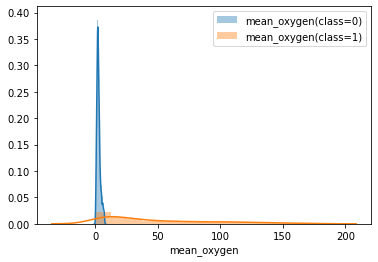

mean_oxygen(class=0) p-value: 1.783009547260327e-35
mean_oxygen(class=1) p-value: 2.087739837559846e-27


In [123]:
distributions = test_normality(data, "mean_oxygen", "class", [0,1])

Ako mozno vidiet, dane atributy nemaju normalnu distribuciu, je teda potrebne pouzit nie-parametricke statisticke testy, konkretne pouzijeme **Mann-Whitney U test**.

In [124]:
mann_whitney(distributions)

Hodnota pvalue: 0.0
Zamietame hypotezu H0
Sila testu: 1.0
Dostatocne velka sila testu


### Hypoteza 2:

H0: Outliery atributu age su len chybne napisane veky, ktore boli prenasobene 100, resp. -100. Po vydeleni danou konstatou na kladne hodnoty, pochadzaju dane hodnoty z rovnakej distribucie ako spravne zapisane veky.

H1: Outliery atributu age nie su chybne napisane veky, ktore boli prenasobene 100, resp. -100. Po vydeleni danou konstatou na kladne hodnoty, dane hodnoty nepochadzaju z rovnakej distribucie ako spravne zapisane veky.

In [125]:
neg_age = data["age"][data["age"] < 0] / -100
pos_age = data["age"][data["age"] >= 100] / 100
norm_age = data["age"][(data["age"] > 0) & (data["age"] < 100)]

In [126]:
#odstranime outliery
neg_age = neg_age.drop(index=identify_outliers(neg_age).index).values
pos_age = pos_age.drop(index=identify_outliers(pos_age).index).values
norm_age = norm_age.drop(index=identify_outliers(norm_age).index).values
repaired_age = np.array(list(neg_age) + list(pos_age))

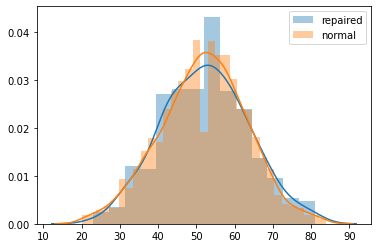

In [127]:
sns.distplot(repaired_age, label="repaired")
sns.distplot(norm_age, label="normal")

plt.legend()
plt.show()

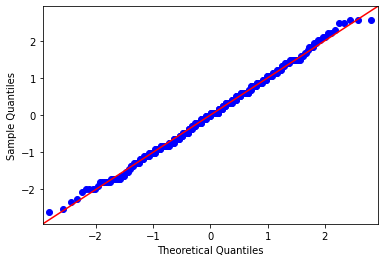

In [128]:
_ = sm.ProbPlot(repaired_age, fit=True).qqplot(line='45')

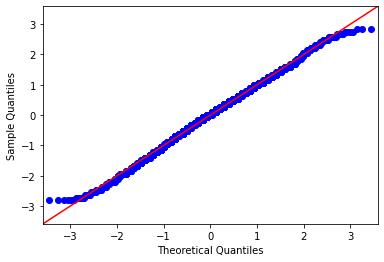

In [129]:
_ = sm.ProbPlot(norm_age, fit=True).qqplot(line='45')

In [130]:
print("P-value:", stats.shapiro(repaired_age)[1])
print("P-value:", stats.shapiro(norm_age)[1])

P-value: 0.34641027450561523
P-value: 4.7748703764227685e-06


Budeme znova musiet pouzit nie-parametrovy test - **Mann-Whitney U test**

In [131]:
mann_whitney((repaired_age, norm_age))

Hodnota pvalue: 0.3526724022636749
Nedokazeme zamietnut hypotezu H0


Nedokazeme zamietnut H0, teda nezamietame fakt, ze dane nerealne hodnoty mohli byt vytvorene sposobom, aky je opisany v hypoteze.

### Hypoteza 3

H0: Muzi odpracuju rovnaky pocet hodin ako zeny

H1: Muzi pracuju viac/menej hodin ako zeny. 

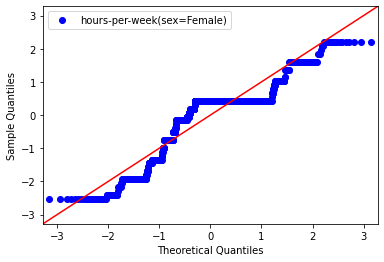

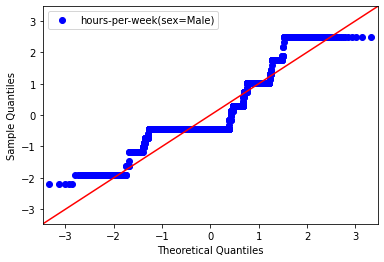

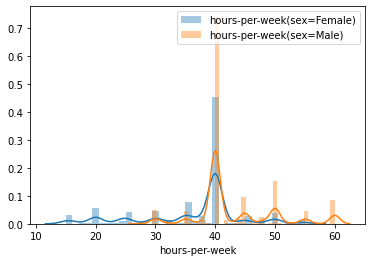

hours-per-week(sex=Female) p-value: 1.2982929559281132e-32
hours-per-week(sex=Male) p-value: 9.80908925027372e-45


In [132]:
data["sex"] = data["sex"].apply(lambda row: row.strip())

distributions = test_normality(data, "hours-per-week", "sex", ["Female", "Male"])

Znova nejde o normalnu distribuciu. Ideme pouzit nie-parametrovy test - **Mann-Whitney U test**

In [133]:
mann_whitney(distributions)

Hodnota pvalue: 3.6896025265087793e-109
Zamietame hypotezu H0
Sila testu: 1.0
Dostatocne velka sila testu


S velkou silou testu zamiestame hypotezu H0, teda tvrdime, ze muzi a zeny pracuju rozdielny pocet hodin

# PROBLEMY

#### Možné problémy v dátach
	- nevhodná štruktúra dát (dáta nie sú v tabuľkovej podobe alebo jedna entita je opísaná viacerými riadkami tabuľky)
	- duplicitné záznamy, resp. nejednoznačné mapovanie medzi záznamami
	- nejednotné formáty dát
	- chýbajúce hodnoty
	- vychýlené (odľahlé) hodnoty (angl. outliers)
	- a ďalšie

In [134]:
data = pd.read_csv("./data/other_train.csv", index_col=0)

In [135]:
#moje su len vo vacsom dataframe
attributes_marcel = ["marital-status", "pregnant", "relationship", "education", "education-num", "occupation", 
                     "income", "fnlwgt", "workclass", "hours-per-week", "capital-gain", "capital-loss", "medical_info", 
                     "class"]

data = data[attributes_marcel]

## 50 pacientov vo vacsom dataframe je zapisany pomocou 2 zaznamov, pricom nejde o duplikaty, ale skor o nejake rozbitie udajov. Bude potrebne ich nejak mergnut

## Vo vacsine kategorickych atributoch je na zaciatku hodnot whitespace

#### age
- V tomto atribute je velke mnozstvo outlierov, ktorych hodnoty nie su realne. Toto sme uz riesili a aj pomocou testu sme dokazali nezamietnut hypotezu o tom, ako dane nerealne hodnoty vieme namapovat na realne

#### marital-status
- Je tam viacero hodnot, ktorych pocet je strasne maly. Asi by bolo vhodne spojit vsetky hodnoty, ktore tvrdia, ze dany clovek je married

#### pregnant
- Vela rovnakych hodnot (f, F, FALSE...), ktore reprezentuju rovnaku hodnotu.

#### education
- Tu je potrebne zmensit pocet kategorii, kedze vacsina z nich je irelevantna uz len z toho dovodu, ze su malo pocetne. Medzi prvou optimalizaciou je, aby vacsina kategorii, ktore riesia este deti, teda tych pacientov, ktori este chodia na high-school, resp. este nizsie, aby boli oni reprezentovani jednou kategoriou. Aj tak ich pocetnost v jednotlivych kategoriach je minimalna, tak im iba prospeje, ked sa vytvori nova kategoria.
- Vytvorime kategoriu, ktora bude obsahovat preschool a skupinu K-12, co reprezentuje 12 rocnikov od elementary school po high school. Nieco na tento sposob sme uz skusali pri analyze vyssie.

#### occupation
- Tu je problem s velkym poctom kategorii, ktore nie su relevantne, kedze su malopocetne zastupene. Jednym s moznych rieseni je dane malopocetne hodnoty zoskupit a nazvat napriklad Other.
- Vsetky, resp. vacsina hodnot je zduplikovanych - jedna polovica pouziva ako separator "-", druha "_"
- Existuje tu hodnota ?, co reprezentuje missing values

#### income
- Duplicitne hodnoty, ktore su len inak sformatovane.

#### workclass
- Aj tu mame ?, ktory reprezentuje missing values

#### capital-gain a capital-loss
- Tento atribut mozme rovno vymazat, zo 90% hodnot sa rovnaju 0, co usudzujem znamena missing value
- A aj keby 0 neznamenala missing value a tieto atributy su zviazane, tak najdeme pomaly 90% zaznamov, kde obidve hodnoty sa rovnaju 0
- Pre istotu sme skusali sa pozriet aj na nenulove hodnoty, ci maju vobec nejaku vypovednu hodnotu na y - class, no neboli nicim vyznamne...

#### medical_info
- Tento atribut obsahuje 4 atributy k obsahu kyslika v krvi pacienta, tieto atributy v ramci analyzy sme uz rozdelili
- Pokial pacientovi chybaju aj informacie o glukoze, aj o kysliku, tak rovno ho mozeme vymazat, lebo vacsina tychto atributov, ktore su merane z krvy, maju silnu korelaciu k samotnemu y - class

# OTAZKA:

Mame pre jednotlive atributy urcit sposob, akym nahradit missing value, resp. pracu s outliermi?